Working with Python 3.10.8 | packaged by conda-forge | (main, Nov 22 2022, 08:26:04) [GCC 10.4.0]


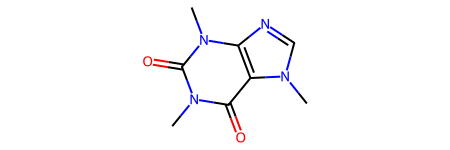

In [1]:
import sys
print(f'Working with Python {sys.version}')

import numpy as np
import pandas as pd
import importlib
#import swifter
import matplotlib.pyplot as plt
import seaborn as sns
import collections
import time
import os
from rdkit import Chem
from rdkit.Chem import AllChem
from rdkit.Chem import Draw
import rdkit.Chem.Descriptors as Descriptors
from rdkit.Chem import PandasTools
#!pip install spektral


# Deep Learning
import sklearn
#import spektral
from sklearn.model_selection import train_test_split
# Keras
from sklearn.model_selection import train_test_split
#import stellargraph as sg
from rdkit import RDLogger


#
# Load Modules
sys.path.append("..")
from os.path import expanduser
home = expanduser("~")
import fiora.IO.mspReader as mspReader
import fiora.visualization.spectrum_visualizer as sv
import fiora.IO.molReader as molReader


RDLogger.DisableLog('rdApp.*')


caffeine_smiles = 'CN1C=NC2=C1C(=O)N(C(=O)N2C)C'
caffeine_mol = Chem.MolFromSmiles(caffeine_smiles)

caffeine_mol

In [5]:
library_name = "cleaned_spectra.mgf"
library_directory = f"{home}/data/metabolites/GNPS/"
!ls $library_directory

cleaned_spectra.mgf  download_06_23  firstdownload  sources.txt


In [8]:
import fiora.IO.mgfReader as mgfReader

df = mgfReader.read(os.path.join(library_directory, library_name), as_df=True)

In [25]:
df.columns#

Index(['TITLE', 'CHARGE', 'COMPOUND_NAME', 'ADDUCT', 'SMILES', 'SCANS',
       'MS_MASS_ANALYZER', 'MS_IONISATION', 'SPECTRUM_ID', 'IONMODE',
       'PRECURSOR_MZ', 'INCHIKEY', 'INCHI', 'PARENT_MASS', 'peaks',
       'COLLISION_ENERGY', 'MS_MANUFACTURER', 'MS_DISSOCIATION_METHOD',
       'SALT_IONS', 'FORMULA'],
      dtype='object')

In [30]:
df["COLLISION_ENERGY"] = df["COLLISION_ENERGY"].astype(float)

<Axes: xlabel='COLLISION_ENERGY', ylabel='Count'>

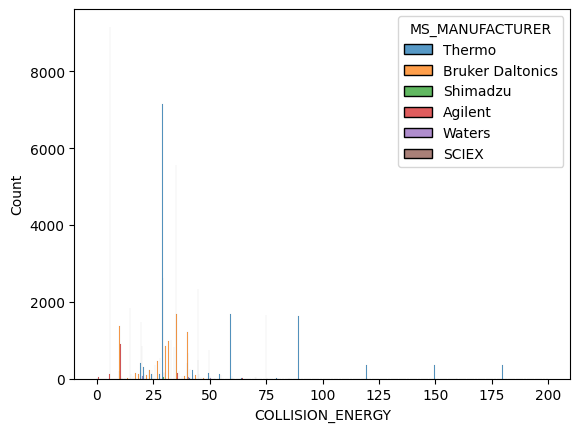

In [34]:
#TODO ANALYSE DATASET

sns.histplot(data=df, x="COLLISION_ENERGY", hue="MS_MANUFACTURER", multiple="dodge")

In [40]:
df["MS_MANUFACTURER"].value_counts()

MS_MANUFACTURER
Thermo              294168
Bruker Daltonics     25206
Waters                9658
Agilent               3592
Shimadzu                86
SCIEX                    2
Name: count, dtype: int64

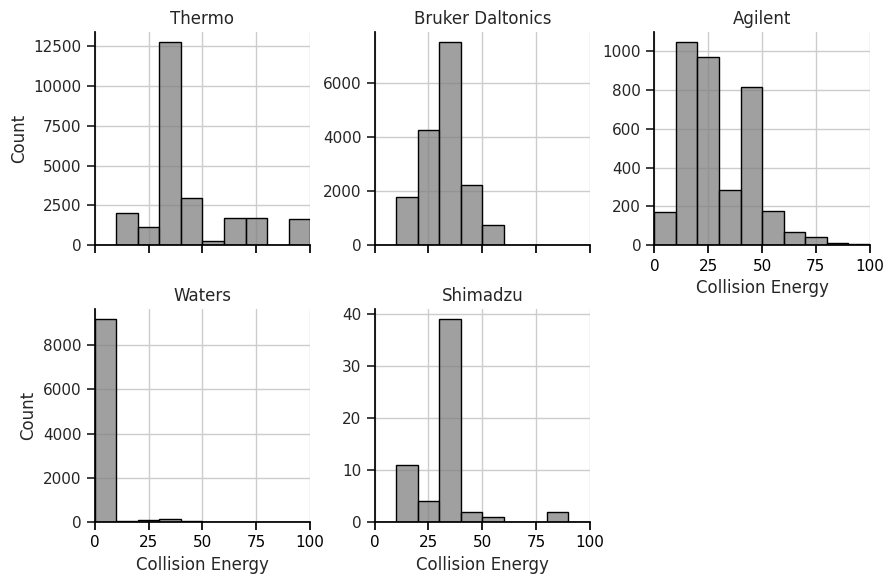

In [57]:
import seaborn as sns
import matplotlib.pyplot as plt
from fiora.visualization.define_colors import *

set_light_theme()

# Define custom color palette
 # Example colors

# Create a FacetGrid with each subplot for a different manufacturer
g = sns.FacetGrid(df.dropna(subset=["COLLISION_ENERGY"]), col="MS_MANUFACTURER", col_wrap=3, sharex=True, sharey=False)
g.map(sns.histplot, "COLLISION_ENERGY", bins=range(0, 101, 10), kde=False, color="gray", edgecolor="black")

# Set common labels and titles
g.set_axis_labels("Collision Energy", "Count")
g.set_titles("{col_name}")

# Set x-axis limits for all subplots
g.set(xlim=(0, 100))
plt.subplots_adjust(hspace=0.3, wspace=0.3)
plt.show()

### Previous Version

In [2]:
library_name = "ALL_GNPS"
library_directory = f"{home}/data/metabolites/GNPS/download_06_23/"
!ls $library_directory

ALL_GNPS.json  ALL_GNPS_NO_PROPOGATED.json  CASMI.json
ALL_GNPS.mgf   ALL_GNPS_NO_PROPOGATED.mgf   CASMI.mgf
ALL_GNPS.msp   ALL_GNPS_NO_PROPOGATED.msp   CASMI.msp


In [3]:
import json

f = open(library_directory + library_name + ".json")
js = json.load(f)
df = pd.DataFrame(js)

In [4]:
print(df.columns)
len(df.columns)

Index(['spectrum_id', 'source_file', 'task', 'scan', 'ms_level',
       'library_membership', 'spectrum_status', 'peaks_json', 'splash',
       'submit_user', 'Compound_Name', 'Ion_Source', 'Compound_Source',
       'Instrument', 'PI', 'Data_Collector', 'Adduct', 'Scan', 'Precursor_MZ',
       'ExactMass', 'Charge', 'CAS_Number', 'Pubmed_ID', 'Smiles', 'INCHI',
       'INCHI_AUX', 'Library_Class', 'SpectrumID', 'Ion_Mode', 'create_time',
       'task_id', 'user_id', 'InChIKey_smiles', 'InChIKey_inchi',
       'Formula_smiles', 'Formula_inchi', 'url', 'annotation_history'],
      dtype='object')


38

In [9]:
ms = df[df["library_membership"] == "MASSBANK"]

In [15]:
ms.iloc[0]["annotation_history"]

[{'Compound_Name': 'Massbank:BML00001 Cytisine',
  'Ion_Source': 'ESI',
  'Compound_Source': 'Isolated',
  'Instrument': 'LC-ESI-QTOF',
  'PI': 'Putative Massbank Match',
  'Data_Collector': 'Massbank',
  'Adduct': '[M+H]+',
  'Scan': '-1',
  'Precursor_MZ': '191.118',
  'ExactMass': '0.0',
  'Charge': '1',
  'CAS_Number': '485-35-8',
  'Pubmed_ID': 'N/A',
  'Smiles': 'C1[C@H]2CNC[C@@H]1C3=CC=CC(=O)N3C2',
  'INCHI': '1S/C11H14N2O/c14-11-3-1-2-10-9-4-8(5-12-6-9)7-13(10)11/h1-3,8-9,12H,4-7H2/t8-,9+/m0/s1',
  'INCHI_AUX': 'N/A',
  'Library_Class': '3',
  'SpectrumID': 'CCMSLIB00000204741',
  'Ion_Mode': 'Positive',
  'create_time': '2014-08-01 16:31:38.0',
  'task_id': '2b0fcfed18d74148aa284e857bb00e4d',
  'user_id': 'mwang87'}]

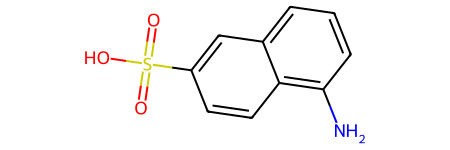

In [16]:
a = "NC1=C2C=CC(=CC2=CC=C1)S(O)(=O)=O"

Chem.MolFromSmiles(a)

In [ ]:
#from PyCFMID.PyCFMID import fraggraph_gen
#caffeine_smiles = 'CN1C=NC2=C1C(=O)N(C(=O)N2C)C'
#
#frags = fraggraph_gen(caffeine_smiles, max_depth=2, ionization_mode='+', fullgraph=True, output_file=None)

## Spectral Library
### Library loading process
Load NIST17 (*nist_msms.msp*)

In [ ]:
nist_msp = mspReader.read(library_directory + library_name + '.MSP')
df_nist = pd.DataFrame(nist_msp)

#df_nist['mol'] = df_nist['SMILES'].apply(Chem.MolFromSmiles)
#df_nist.dropna(inplace=True)
print(f"Spectral file loaded with {df_nist.shape[0]} entries and {df_nist.shape[1]} variables")


Spectral file loaded with 574826 entries and 29 variables


In [ ]:
# Search for Example
#example_entry = "Desipramine"
#x = df_nist[df_nist["Name"] == example_entry]
#for i in x.index:
#    z = df_nist.loc[i]
#    
#    print(z.ID, z.CE)
#    print(z["peaks"]["mz"])
#    print(z["peaks"]["intensity"])
#    print("--------------")
    
#print(x.loc[32271])

In [ ]:
# Example
example_entry = "Desipramine"
#x = df_nist[df_nist["Name"] == example_entry].iloc[0]
EXAMPLE_ID = 32271
x = df_nist.loc[EXAMPLE_ID]
print(x)

Name                                                           Desipramine
Synon                    5H-Dibenz[b,f]azepine-5-propanamine, 10,11-dih...
Notes                    Consensus spectrum; Acetonitrile/Water/Formic ...
Precursor_type                                                      [M+H]+
Spectrum_type                                                          MS2
PrecursorMZ                                                       267.1856
Instrument_type                                                      Q-TOF
Instrument                                               Agilent QTOF 6530
Sample_inlet                                         direct flow injection
Ionization                                                             ESI
Collision_energy                                                        23
Ion_mode                                                                 P
Special_fragmentation                                                  NaN
InChIKey                 

### Library filtering process
Plot statistics and define filters for target spectra

In [ ]:
# Define figure styles
color_palette = sns.color_palette("magma_r", 8)
sns.set_theme(style="whitegrid",
                  rc={'axes.edgecolor': 'black', 'ytick.left': True, 'xtick.bottom': True, 'xtick.color': 'black',
                      "axes.spines.bottom": True, "axes.spines.right": True, "axes.spines.top": True,
                      "axes.spines.left": True})


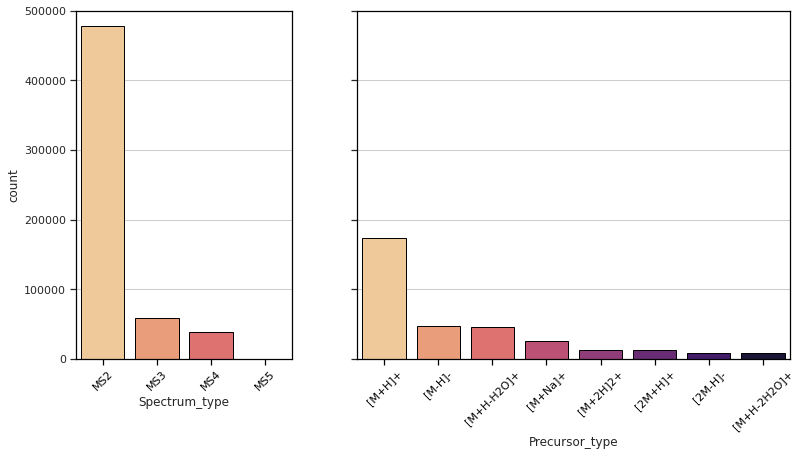

In [ ]:


fig, axs = plt.subplots(1, 2, figsize=(12.8, 6.4), gridspec_kw={'width_ratios': [1, 2]}, sharey=True)
fig.set_tight_layout(False)
for ax in axs:
    ax.tick_params('x', labelrotation=45)

sns.countplot(ax=axs[0], data=df_nist, x='Spectrum_type', edgecolor="black", palette=color_palette)
sns.countplot(ax=axs[1], data=df_nist, x='Precursor_type', edgecolor="black", palette=color_palette, order=df_nist['Precursor_type'].value_counts().iloc[:8].index)
axs[0].set_ylim(0, 500000)
axs[1].set_ylabel("")

plt.show()


In [ ]:
# Filters
df_nist = df_nist[df_nist["Spectrum_type"] == "MS2"]
target_precursor_type = ["[M+H]+", "[M-H]-", "[M+H-H2O]+", "[M+Na]+"]
df_nist = df_nist[df_nist["Precursor_type"].apply(lambda ptype: ptype in target_precursor_type)]

# Formats
df_nist['PrecursorMZ'] = df_nist["PrecursorMZ"].astype('float')
df_nist['Num peaks'] = df_nist["Num peaks"].astype('int')


print(f"Spectral file filtered down to {df_nist.shape[0]} entries")

Spectral file filtered down to 291509 entries


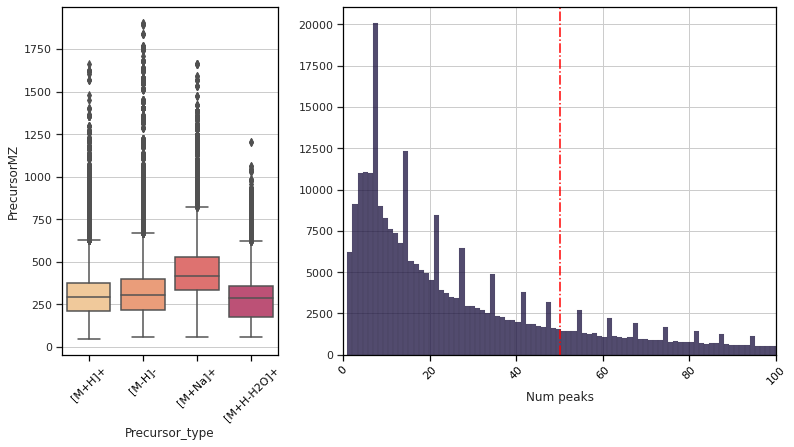

In [ ]:
fig, axs = plt.subplots(1, 2, figsize=(12.8, 6.4), gridspec_kw={'width_ratios': [1, 2]}, sharey=False)
for ax in axs:
    ax.tick_params('x', labelrotation=45)

sns.boxplot(ax=axs[0], data=df_nist, y='PrecursorMZ', palette=color_palette, x="Precursor_type")
sns.histplot(ax=axs[1], data=df_nist, x='Num peaks', color=color_palette[7], fill=True, edgecolor="black")#, order=list(range(0,200)))
plt.rcParams["patch.force_edgecolor"] = True
plt.rcParams['axes.edgecolor'] = 'black'
axs[1].set_ylabel("")
axs[1].set_xlim([0, 100])
axs[1].axvline(x=50, color="red", linestyle="-.")

plt.show()

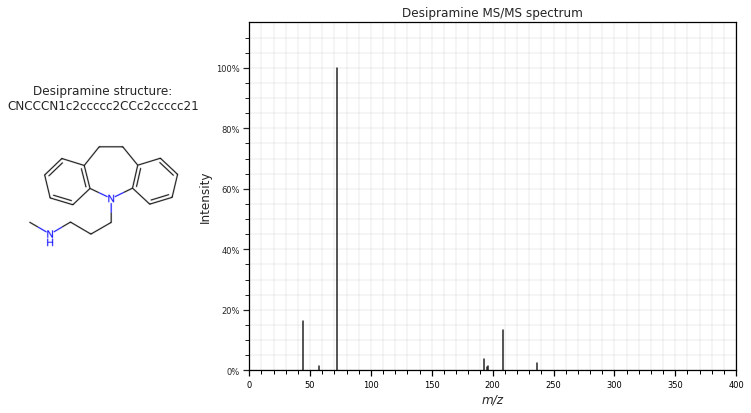

In [ ]:
# associate MOL structures with MS2 spectra

file = library_directory + library_name + ".MOL/" + "S" + x["CASNO"] + ".MOL"
x_mol = molReader.load_MOL(file)
x_mol

fig, axs = plt.subplots(1, 2, figsize=(12.8, 6.4), gridspec_kw={'width_ratios': [1, 3]}, sharey=False)

img = Chem.Draw.MolToImage(x_mol, ax=axs[0])

axs[0].grid(False)
axs[0].tick_params(axis='both', bottom=False, labelbottom=False, left=False, labelleft=False)
axs[0].set_title(x["Name"]+ " structure:\n" + Chem.MolToSmiles(x_mol))
axs[0].imshow(img)
axs[0].axis("off")
sv.plot_spectrum(title=x["Name"] + " MS/MS spectrum", spectrum=x, ax=axs[1])


In [ ]:

#print(df_nist.loc[1474])

print("Reading structure information in MOL format from library files (this may take a while)")
def fetch_mol(data):
    file = library_directory + library_name + ".MOL/" + "S" + str(data["CASNO"]) + ".MOL"
    if not os.path.exists(file):
        file = library_directory + library_name + ".MOL/" + "ID" + str(data["ID"]) + ".MOL"
    return molReader.load_MOL(file)

df_nist= df_nist[~df_nist["InChIKey"].isnull()] # Drop all without key (Not neccessarily neccesary)
df_nist["MOL"] = df_nist.apply(fetch_mol, axis=1)
print(f"Successfully interpreted {sum(df_nist['MOL'].notna())} from {df_nist.shape[0]} entries. Dropping the rest.")

df_nist = df_nist[df_nist['MOL'].notna()]
df_nist["SMILES"] = df_nist["MOL"].apply(Chem.MolToSmiles)
df_nist["InChI"] = df_nist["MOL"].apply(Chem.MolToInchi)
df_nist["K"] = df_nist["MOL"].apply(Chem.MolToInchiKey)
df_nist["ExactMolWeight"] = df_nist["MOL"].apply(Chem.Descriptors.ExactMolWt)

#for i in df_nist.index:
#    tight_layout
#    x = df_nist.loc[i]
#    
#    file = library_directory + library_name + ".MOL/" + "S" + str(x["CASNO"]) + ".MOL"
#    if not os.path.exists(file):
#        file = library_directory + library_name + ".MOL/" + "ID" + str(x["ID"]) + ".MOL"
#    print(x["ID"], os.path.exists(file), os.path.exists(file))
#    m = load_MOL(file)


Reading structure information in MOL format from library files (this may take a while)
Successfully interpreted 282576 from 290467 entries. Dropping the rest.


In [ ]:
print(df_nist[df_nist["Name"] == example_entry].iloc[0])
print(len(df_nist["MOL"].unique()))


df_nist.shape
df_nist["SMILES"].isnull().any()

df_nist[df_nist["Name"] == example_entry].iloc[0]["SMILES"]

Name                                                           Desipramine
Synon                    5H-Dibenz[b,f]azepine-5-propanamine, 10,11-dih...
Notes                                                  mol_Vial_ID=1006547
Precursor_type                                                      [M+H]+
Spectrum_type                                                          MS2
PrecursorMZ                                                       267.1856
Instrument_type                                                IT/ion trap
Instrument                                        Thermo Finnigan LCQ Deca
Sample_inlet                                                          HPLC
Ionization                                                            APCI
Collision_energy                         resonant relative/normalized 50 %
Ion_mode                                                                 P
Special_fragmentation                                             wideband
InChIKey                 

'CNCCCN1c2ccccc2CCc2ccccc21'

In [ ]:
correct_keys = df_nist.apply(lambda x: x["InChIKey"] == x["K"], axis=1)
s = "confirmed!" if correct_keys.all() else "not confirmed !! Attention!"
print(f"Confirming whether computed and provided InChI-Keys are correct. Result: {s} ({correct_keys.sum()/len(correct_keys):0.2f} correct)")
half_keys = df_nist.apply(lambda x: x["InChIKey"].split('-')[0] == x["K"].split('-')[0], axis=1)
s = "confirmed!" if half_keys.all() else "not confirmed !! Attention!"
print(f"Checking if main layer InChI-Keys are correct. Result: {s} ({half_keys.sum()/len(half_keys):0.3f} correct)")

print("Dropping all other.")
df_nist["matching_key"] = df_nist.apply(lambda x: x["InChIKey"] == x["K"], axis=1)
df_nist = df_nist[df_nist["matching_key"]]

print(f"Shape: {df_nist.shape}")

Confirming whether computed and provided InChI-Keys are correct. Result: not confirmed !! Attention! (0.91 correct)
Checking if main layer InChI-Keys are correct. Result: not confirmed !! Attention! (0.997 correct)
Dropping all other.
Shape: (255866, 35)


In [ ]:
df_nist["ExactMolWeight"] = df_nist["MOL"].apply(Chem.Descriptors.ExactMolWt)

### Filtering
Introduce harsh filters to produce a high quality sample.

In [ ]:
MIN_PEAKS = 2
MAX_PEAKS = 30
PRECURSOR_TYPES = ["[M+H]+"]
from modules.MOL.constants import ADDUCT_WEIGHTS



df_nist = df_nist[df_nist["Num peaks"] > MIN_PEAKS]
df_nist = df_nist[df_nist["Num peaks"] < MAX_PEAKS]
df_nist["theoretical_precursor_mz"] = df_nist["ExactMolWeight"] + df_nist["Precursor_type"].map(ADDUCT_WEIGHTS)
df_nist = df_nist[df_nist["Precursor_type"].apply(lambda ptype: ptype in PRECURSOR_TYPES)]
df_nist["precursor_offset"] = df_nist["PrecursorMZ"] - df_nist["theoretical_precursor_mz"]

print(f"Shape {df_nist.shape}")

Shape (92049, 37)


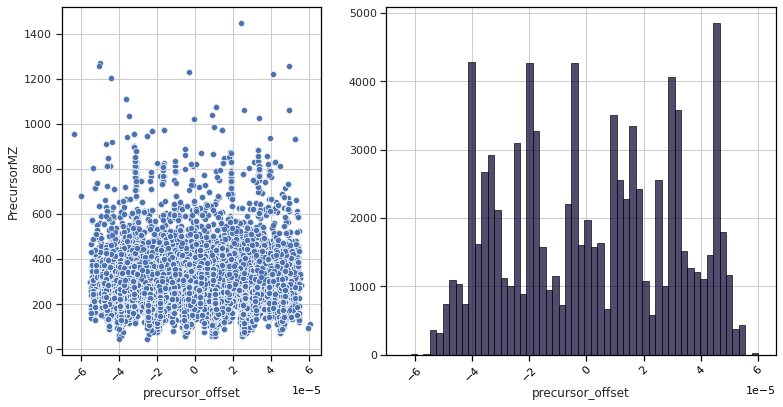

In [ ]:
fig, axs = plt.subplots(1, 2, figsize=(12.8, 6.4), gridspec_kw={'width_ratios': [1, 1.5]}, sharey=False)
for ax in axs:
    ax.tick_params('x', labelrotation=45)

sns.scatterplot(ax=axs[0], data=df_nist,x="precursor_offset", y='PrecursorMZ', palette=color_palette)
sns.histplot(ax=axs[1], data=df_nist, x='precursor_offset', color=color_palette[7], fill=True, edgecolor="black")#, order=list(range(0,200)))
plt.rcParams["patch.force_edgecolor"] = True
plt.rcParams['axes.edgecolor'] = 'black'
axs[1].set_ylabel("")
#axs[1].set_xlim([0, 100])
#axs[1].axvline(x=50, color="red", linestyle="-.")

plt.show()

#### Align and filter Collision Energy

443 unqiue CE
Q: How to align different CE, INT, INTeV, %, ...

In [ ]:

# TODO Use more Collision energy types. eg. ramps, resonant...

import modules.MOL.collision_energy # TODO MOVE ALIGN CE BACK TO modules.MOL.


def NCE_to_eV(nce, precursor_mz, charge=1):
    return nce * precursor_mz / 500 * charge_factor[charge]

def align_CE(ce, precursor_mz):
    if type(ce) == float:
        return ce
    if "eV" in ce:
        ce = ce.replace("eV", "")
        return float(ce)
    elif "%" in ce:
        nce = ce.split('%')[0].strip().split(' ')[-1]
        try:
            nce = float(nce)
            return NCE_to_eV(nce, precursor_mz)
        except:
            return ce
    else:
        try: 
            ce = float(ce)
            return ce
        except:
            return ce

charge_factor = {1: 1, 2: 0.9, 3: 0.85, 4: 0.8, 5: 0.75}



df_nist["CE"] = df_nist.apply(lambda x: align_CE(x["Collision_energy"], x["theoretical_precursor_mz"]), axis=1) #modules.MOL.collision_energy.align_CE) 
df_nist["CE_type"] = df_nist["CE"].apply(type)
df_nist["CE_derived_from_NCE"] = df_nist["Collision_energy"].apply(lambda x: "%" in str(x))
# df_test = df_nist[df_nist["Collision_energy"].apply(lambda x: "%" in str(x))]["Collision_energy"]
# df_test = df_test.apply(lambda x: x.split('%')[0].strip().split(' ')[-1])
# for d in df_test:
#     try: 
#         float(d)
#     except:
#         print(d)



print("Distinguish CE absolute values (eV - float) and normalized CE (in % - str format)")
print(df_nist["CE_type"].value_counts())

print("Removing all but absolute values")
df_nist = df_nist[df_nist["CE_type"] == float]
df_nist = df_nist[~df_nist["CE"].isnull()]
#len(df_nist['CE'].unique())

print(f'Detected {len(df_nist["CE"].unique())} unique collision energies in range from {np.min(df_nist["CE"])} to {max(df_nist["CE"])} eV')


Distinguish CE absolute values (eV - float) and normalized CE (in % - str format)
<class 'float'>    91868
<class 'str'>        181
Name: CE_type, dtype: int64
Removing all but absolute values
Detected 5156 unique collision energies in range from 0.0 to 277.0 eV


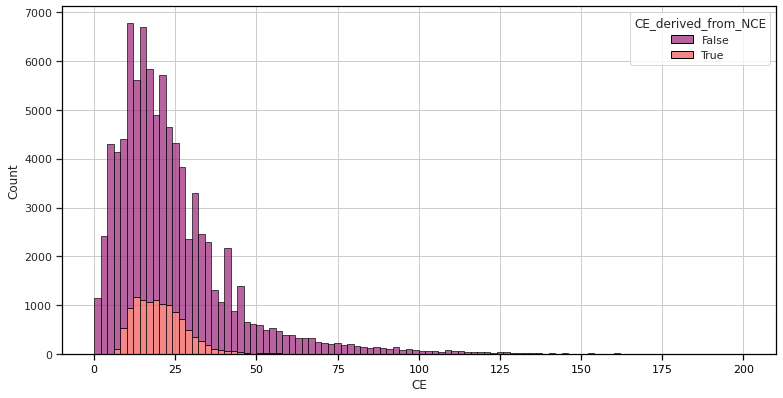

90938 spectra remaining with aligned absolute collision energies


In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(12.8, 6.4))
#for ax in axs:
#    ax.tick_params('x', labelrotation=45)

#sns.scatterplot(ax=axs[0], data=df_nist,x="precursor_offset", y='PrecursorMZ', palette=color_palette)
sns.histplot(ax=ax, data=df_nist, x='CE', hue="CE_derived_from_NCE", palette=[color_palette[4], color_palette[2]], multiple="stack", fill=True, binwidth=2, edgecolor="black", binrange=[0, 200])#, order=list(range(0,200)))
plt.rcParams["patch.force_edgecolor"] = True
plt.rcParams['axes.edgecolor'] = 'black'
plt.show()
print(f"{df_nist.shape[0]} spectra remaining with aligned absolute collision energies")

### Matching 1st-order peaks 
Matching first order peaks to molecule fragments by cutting a single edge. First build an *in silico* fragmentation tree for each molecular structure, but cutting edges in the molecular structure graph. Then, fragments ion masses are compared to peaks in the mass spectrum.
#### Graph representation
Creating molecular structure graph

In [ ]:
%%capture
from modules.MOL.Metabolite import Metabolite
from modules.MOL.constants import PPM
TOLERANCE = 200 * PPM


df_nist["Metabolite"] = df_nist["SMILES"].apply(Metabolite)
df_nist["Metabolite"].apply(lambda x: x.create_molecular_structure_graph())
df_nist["Metabolite"].apply(lambda x: x.compute_graph_attributes())
df_nist["Metabolite"].apply(lambda x: x.fragment_MOL())
df_nist.apply(lambda x: x["Metabolite"].match_fragments_to_peaks(x["peaks"]["mz"], x["peaks"]["intensity"], tolerance=TOLERANCE), axis=1)

In [ ]:
from modules.MOL.mol_graph import mol_to_graph, get_adjacency_matrix, get_degree_matrix, get_edges, get_identity_matrix, draw_graph

from modules.GNN.AtomFeatureEncoder import AtomFeatureEncoder
node_encoder = AtomFeatureEncoder()

In [ ]:

num_elems = 12
def add_dataframe_features(df):
    df['graph'] = df['MOL'].apply(mol_to_graph)
    #df['features'] = df['graph'].apply(node_encoder.encode)
    df['A'] =  df['graph'].apply(get_adjacency_matrix)
    df['Atilde'] =  df['A'].apply(lambda x: x + np.eye(N=x.shape[0]))
    df['Id'] = df['A'].apply(get_identity_matrix)
    df['deg'] = df['A'].apply(get_degree_matrix)
    df['is_aromatic'] = df['graph'].apply(lambda x: np.array([[x.nodes[atom]['is_aromatic'] for atom in x.nodes()]]).T)

    # Extras

    #df['Xsymbol'] = df['graph'].apply(lambda x: [x.nodes[atom]['atom_symbol'] for atom in x.nodes()])
    #df['Xi'] = df['graph'].apply(lambda x: [min(x.nodes[atom]['atomic_num'], num_elems - 1) for atom in x.nodes()])
    #df['X'] = df['Xi'].apply(lambda x: to_categorical(x, num_classes=num_elems))
    
    #df['isN'] = df['graph'].apply(lambda x: np.array([[int(x.nodes[atom]['atom_symbol'] == 'N') for atom in x.nodes()]]))
    #df['isN_in_radius1'] = [df.loc[i, 'Atilde'] * df.loc[i,'isN'].T for i in df.index]
    #df['isN_in_radius1'] = df['isN_in_radius1'].apply(lambda x: x.clip(0, 1))
    #df['isN_neighboring'] = [df.loc[i, 'A'] * df.loc[i,'isN'].T for i in df.index]
    #df['isN_neighboring'] = df['isN_neighboring'].apply(lambda x: x.clip(0, 1))
    return df
df_nist = add_dataframe_features(df_nist)

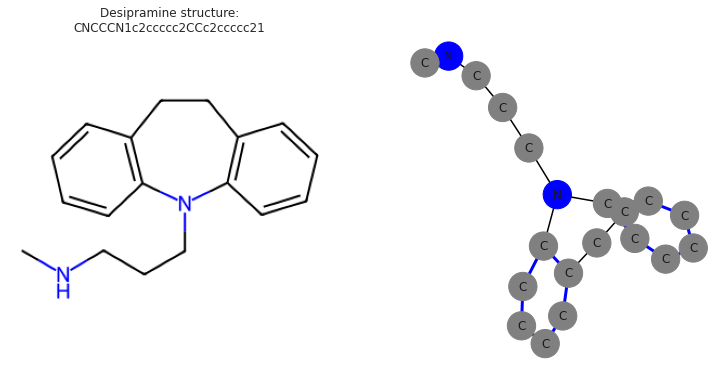

{'mz': [44.05, 57.06, 72.08, 193.09, 195.1, 196.11, 208.11, 236.14], 'intensity': [161.64, 14.89, 999.0, 37.86, 11.59, 13.79, 133.57, 25.37], 'annotation': []}


In [ ]:
x = df_nist.loc[EXAMPLE_ID]

fig, axs = plt.subplots(1, 2, figsize=(12.8, 6.4), gridspec_kw={'width_ratios': [1, 1]}, sharey=False)

img = Chem.Draw.MolToImage(x_mol, ax=axs[0])

axs[0].grid(False)
axs[0].tick_params(axis='both', bottom=False, labelbottom=False, left=False, labelleft=False)
axs[0].set_title(x["Name"]+ " structure:\n" + Chem.MolToSmiles(x_mol))
axs[0].imshow(img)
axs[0].axis("off")

g_img = draw_graph(x["graph"], ax=axs[1])
print(x["peaks"])

In [ ]:
import networkx as nx

#TODO Refactor compute_helper_matrices and so on
#def add_dataframe_edge_features(df):
#    df['AL'] = df.apply(lambda x: compute_helper_matrices(nx.convert_matrix.to_numpy_matrix(x["graph"]), x['deg'], x['graph']), axis=1)
#    df['AR'] = df['AL'].apply(lambda x: x[1])
#    df['edges_is_aromatic'] = df['AL'].apply(lambda x: np.array([x[2]]).T)
#    df['edges'] = df['AL'].apply(lambda x: x[3])
#    df['AL'] = df['AL'].apply(lambda x: x[0])
#    return df

#df_nist = add_dataframe_edge_features(df_nist)

In [ ]:
d = df_nist.iloc[0]
nx.convert_matrix.to_numpy_matrix(d["graph"])
d["A"]

tensor([[0., 1., 1., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0., 0., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 1., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 1., 1., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 0., 1., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 1., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0

In [ ]:
from modules.MOL.FragmentationTree import FragmentationTree
importlib.reload(modules.MOL.FragmentationTree)
importlib.reload(modules.MOL.mol_graph)

x = df_nist.loc[EXAMPLE_ID]

FT = x["Metabolite"].fragmentation_tree

FT.get_fragment(3)

<Fragment Object> :: CN

In [ ]:
import modules.IO.fraggraphReader as fraggraphReader
importlib.reload(modules.MS.ms_utility)
from modules.MS.ms_utility import find_matching_peaks, match_fragment_lists
importlib.reload(modules.IO.fraggraphReader)
importlib.reload(modules.MOL.FragmentationTree)
from modules.MOL.FragmentationTree import FragmentationTree


f = fraggraphReader.parser_fraggraph_gen(library_directory + "examples/CNCCCN1c2ccccc2CCc2ccccc21_fraggraph.txt")
x = df_nist.loc[EXAMPLE_ID]

match_fragment_lists(x["peaks"]["mz"], f["fragments"]["mass"])

([(44.05, [44.04947561]), (57.06, [57.06987671]), (72.08, [72.08077574])],
 [(193.09, [196.1120759, 194.0964258]),
  (195.1, [198.1277259, 196.1120759, 194.0964258]),
  (196.11, [198.1277259, 196.1120759, 194.0964258]),
  (208.11, [212.143376, 210.1277259, 208.1120759, 209.1073248, 211.1229749]),
  (236.14,
   [240.1746761,
    238.1590261,
    236.143376,
    241.1699251,
    239.154275,
    237.138625,
    241.1699251,
    239.154275,
    237.138625,
    237.138625,
    239.154275,
    241.1699251,
    241.1699251,
    239.154275,
    237.138625])],
 [])

### Fragmentation Trees
Compute fragmentation tree, by single edge breaks of non-ring bonds.

{'[M+H]+': 267.185574704, '[M-H]+': 265.171022704, '[M-3H]+': 263.15647070399996}[0]
├── {'[M+H]+': 17.038576128, '[M-H]+': 15.024024127999997, '[M-3H]+': 13.009472127999999}[1]
├── {'[M+H]+': 196.11207541599998, '[M-H]+': 194.097523416, '[M-3H]+': 192.082971416}[10]
├── {'[M+H]+': 210.12772547999998, '[M-H]+': 208.11317348, '[M-3H]+': 206.09862148}[8]
├── {'[M+H]+': 224.14337554399998, '[M-H]+': 222.128823544, '[M-3H]+': 220.114271544}[6]
├── {'[M+H]+': 238.15902560799998, '[M-H]+': 236.144473608, '[M-3H]+': 234.129921608}[4]
├── {'[M+H]+': 253.16992463999998, '[M-H]+': 251.15537264, '[M-3H]+': 249.14082064}[2]
├── {'[M+H]+': 32.04947515999999, '[M-H]+': 30.034923159999995, '[M-3H]+': 28.020371159999996}[3]
├── {'[M+H]+': 46.06512522399999, '[M-H]+': 44.050573224, '[M-3H]+': 42.036021223999995}[5]
├── {'[M+H]+': 60.08077528799999, '[M-H]+': 58.066223287999996, '[M-3H]+': 56.051671287999994}[7]
└── {'[M+H]+': 74.096425352, '[M-H]+': 72.08187335199999, '[M-3H]+': 70.067321352}[9]

<Frag

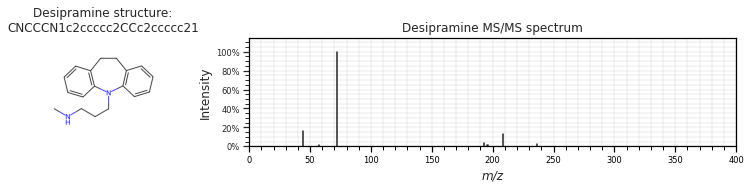

Matching peaks to fragments
{44.05: {'intensity': 161.64, 'fragments': [(<Fragment Object> :: CNC, ('[M-H]+', 44.050573224))], 'edges': [(2, 3)], 'relative_intensity': 0.12122666626667769, 'relative_sqrt_intensity': 0.19672133019709623, 'relative_intensity_wo_precursor': 0.12122666626667769, 'total_relative_intensity': 0.11564630717387729}, 72.08: {'intensity': 999.0, 'fragments': [(<Fragment Object> :: CCCNC, ('[M-H]+', 72.08187335199999))], 'edges': [(4, 5)], 'relative_intensity': 0.7492293961916049, 'relative_sqrt_intensity': 0.48905733348103386, 'relative_intensity_wo_precursor': 0.7492293961916049, 'total_relative_intensity': 0.7147405398830947}, 196.11: {'intensity': 13.79, 'fragments': [(<Fragment Object> :: c1ccc2c(c1)CCc1ccccc1N2, ('[M+H]+', 196.11207541599998))], 'edges': [(4, 5)], 'relative_intensity': 0.010342215589071302, 'relative_sqrt_intensity': 0.05745914569174434, 'relative_intensity_wo_precursor': 0.010342215589071302, 'total_relative_intensity': 0.009866138183171046

In [ ]:

x = df_nist.loc[EXAMPLE_ID]

FT = x["Metabolite"].fragmentation_tree
#frag.build_fragmentation_tree_by_rotatable_bond_breaks()
print(FT)

fig, axs = plt.subplots(1, 2, figsize=(12.8, 2), gridspec_kw={'width_ratios': [1, 3]}, sharey=False)

img = Chem.Draw.MolToImage(x["MOL"], ax=axs[0])

axs[0].grid(False)
axs[0].tick_params(axis='both', bottom=False, labelbottom=False, left=False, labelleft=False)
axs[0].set_title(x["Name"]+ " structure:\n" + x["SMILES"])
axs[0].imshow(img)
axs[0].axis("off")
sv.plot_spectrum(title=x["Name"] + " MS/MS spectrum", spectrum=x, ax=axs[1])

print("Matching peaks to fragments")
print(x["Metabolite"].peak_matches)


### Match fragments and peaks

In [ ]:

df_nist["peak_matches"] = df_nist["Metabolite"].apply(lambda x: getattr(x, "peak_matches"))
df_nist["num_peaks_matched"] = df_nist["peak_matches"].apply(len)


def get_match_stats(matches):
    num_unique, num_conflicts, mode_count = 0, 0, {"[M+H]+": 0, "[M-H]+": 0, "[M-3H]+": 0}
    for mz, match_data in matches.items():
        candidates = match_data["fragments"]
        if len(candidates) == 1:
            num_unique += 1
        elif len(candidates) > 1:
            num_conflicts += 1
        for c in candidates:
            mode_count[c[1][0]] += 1
    return num_unique, num_conflicts, mode_count
d = df_nist.loc[EXAMPLE_ID]



df_nist["match_stats"] = df_nist["peak_matches"].apply(lambda x: get_match_stats(x))
df_nist["num_unique_peaks_matched"] = df_nist.apply(lambda x: x["match_stats"][0], axis=1)
df_nist["num_conflicts_in_peak_matching"] = df_nist.apply(lambda x: x["match_stats"][1], axis=1)
df_nist["match_mode_counts"] = df_nist.apply(lambda x: x["match_stats"][2], axis=1)
u= df_nist["num_unique_peaks_matched"].sum() 
s= df_nist["num_conflicts_in_peak_matching"].sum() 
print(f"Total number of uniquely matched peaks: {u} , conflicts found within {s} matches ({100 * s / (u+s):.02f} %))")
print(f"Total number of conflicting peak to fragment matches: {s}")

df_nist.shape
 

Total number of uniquely matched peaks: 295079 , conflicts found within 41385 matches (12.30 %))
Total number of conflicting peak to fragment matches: 41385


(90938, 53)

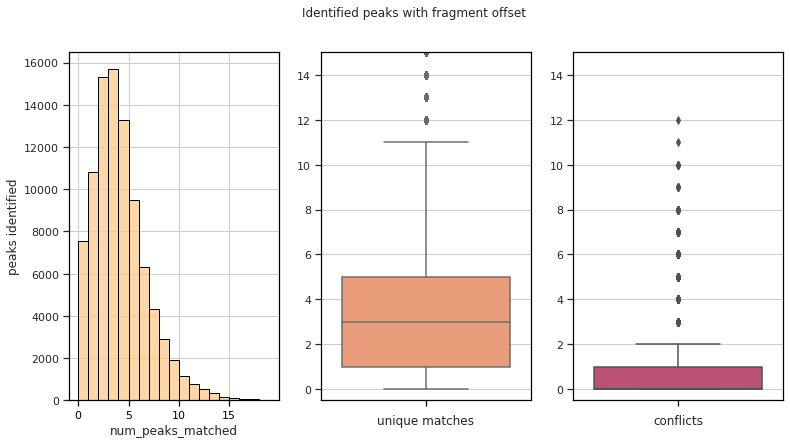

In [ ]:
fig, axs = plt.subplots(1, 3, figsize=(12.8, 6.4), sharey=False)

fig.suptitle(f"Identified peaks with fragment offset")
#plt.title(f"Identified peaks with fragment offset: {str(off)}")
sns.histplot(ax=axs[0],data=df_nist, x="num_peaks_matched", color=color_palette[0], edgecolor="black", bins=range(0,20, 1))
#axs[0].set_ylim(-0.5, 10)
axs[0].set_ylabel("peaks identified")


sns.boxplot(ax=axs[1],data=df_nist, y="num_unique_peaks_matched", color=color_palette[1])
axs[1].set_ylim(-0.5, 15)
axs[1].set_xlabel("unique matches")
axs[1].set_ylabel("")


sns.boxplot(ax=axs[2],data=df_nist, y="num_conflicts_in_peak_matching", color=color_palette[3])
axs[2].set_ylim(-0.5, 15)
axs[2].set_xlabel("conflicts")
axs[2].set_ylabel("")

plt.show()

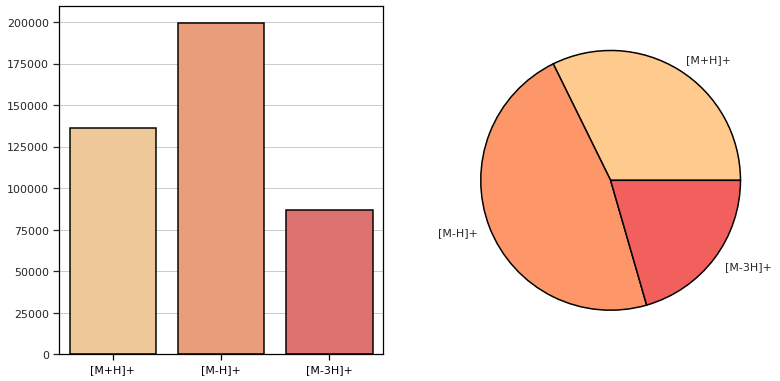

In [ ]:
fig, axs = plt.subplots(1, 2, figsize=(12.8, 6.4), sharey=False)

mode_counts = {"[M+H]+": 0, "[M-H]+": 0, "[M-3H]+": 0}

def update_mode_counts(m):
    for mode in m.keys():
        mode_counts[mode] += m[mode]

df_nist["match_mode_counts"].apply(update_mode_counts)

sns.barplot(ax=axs[0], x=list(mode_counts.keys()), y=[mode_counts[k] for k in mode_counts.keys()], palette=color_palette, edgecolor="black", linewidth=1.5)
axs[1].pie([mode_counts[k] for k in mode_counts.keys()], labels=list(mode_counts.keys()), colors=color_palette, wedgeprops={"edgecolor": "black", "linewidth": 1.5})

plt.show()

In [ ]:

for i in range(0,6):
    print(f"Minimum {i} unique peaks identified (including precursors): ", (df_nist["num_unique_peaks_matched"] >= i).sum())


Minimum 0 unique peaks identified (including precursors):  90938
Minimum 1 unique peaks identified (including precursors):  81889
Minimum 2 unique peaks identified (including precursors):  67020
Minimum 3 unique peaks identified (including precursors):  49822
Minimum 4 unique peaks identified (including precursors):  34650
Minimum 5 unique peaks identified (including precursors):  22761


Save dataframe to file

In [ ]:
save_df = True
name = "nist_msms_filtered"
date = "06_2023"
min_peaks = 5

if save_df:
       key_columns = ['Name', 'Synon', 'Notes', 'Precursor_type', 'Spectrum_type',
              'PrecursorMZ', 'Instrument_type', 'Instrument', 'Sample_inlet',
              'Ionization', 'Collision_energy', 'Ion_mode', 'Special_fragmentation',
              'InChIKey', 'Formula', 'MW', 'ExactMass', 'CASNO', 'NISTNO', 'ID',
              'Comment', 'Num peaks', 'peaks', 'Link', 'Related_CAS#',
              'Collision_gas', 'Pressure', 'In-source_voltage', 'msN_pathway', 'MOL',
              'SMILES', 'InChI', 'K', 'ExactMolWeight', 'matching_key',
              'theoretical_precursor_mz', 'precursor_offset', 'CE', 'CE_type', 'peak_matches',
              'num_peaks_matched', 'match_stats', 'num_unique_peaks_matched',
              'num_conflicts_in_peak_matching', 'match_mode_counts']
       file = library_directory + name + "_min" + str(min_peaks) + "_" + date + ".csv"
       print("saving to ", file)
       df_nist[df_nist["num_unique_peaks_matched"] >= min_peaks][key_columns].to_csv(file)
       
       #df_nist[key_columns].to_csv(library_directory + name + "all" + "_" + date + ".csv")



### Machine Learning
Let's do some machine learning.

Dummy example: Predict node aromaticity based on node feature, with and without the relevant information.

Base line model: Predict edge break tendency (binary) with MLP of only participating atoms and bond featues.




Imports

In [ ]:
import torch
from torch.utils.data import Dataset, DataLoader
from torchmetrics import Accuracy, MetricTracker
from modules.GNN.MLPEdgeClassifier import MLPEdgeClassifier
from modules.GNN.GNNModels import GCNNodeClassifier
#importlib.reload(modules.GNN.GNNModels)
#importlib.reload(modules.GNN.GNNLayers)


In [ ]:

def train(model, dataloader_training, optimizer, loss_fn, tracker, epochs=10):
    for e in range(epochs):
        print(f'Epoch {e + 1}/{epochs}')
        training_loss = 0
        tracker.increment()
        for batch_id, (X, y) in enumerate(dataloader_training):
            
            # Complete the implementation.
            model.train()
            # Compute predictions based on the current set of parameters
            y_pred = model(X)
            # Compute prediction error
            loss = loss_fn(y_pred, y)
            tracker.update(y, (y_pred>0).int())
            # Reset partial derivatives
            optimizer.zero_grad()
            # Compute partial derivatives
            loss.backward()
            # Update model parameters
            optimizer.step()

            # Record loss
            training_loss += loss.item()
            print(f'Avg. training loss {training_loss / (batch_id + 1) :>.3f}', end='\r')

        print('')
        print(f'Accuracy: {tracker.compute():>.4f}')
        training_loss /= len(dataloader_training)

    return training_loss

def validate_gnn(model, dataloader_val, loss_fn, tracker):
    tracker.increment()
    validation_loss = 0

    with torch.no_grad():
        for batch_id, (X, A, y) in enumerate(dataloader_val):
                model.eval()
                y_pred = model(X, A)
                loss = loss_fn(y_pred, y)

                tracker.update(y_pred[0], y[0].int())
                validation_loss += loss.item()

                if batch_id == 500: break


    val_accuracy = tracker.compute()
    validation_loss /= len(dataloader_val)
    print(f' Validation Accuracy: {val_accuracy:>.3f} (Loss: {validation_loss:>.3f})')

    return val_accuracy


def train_gnn(model, training_data, optimizer, loss_fn, tracker, batch_size=1, epochs=5):
    acc = []
    
    train_proportion = 0.8
    train_size = int(len(training_data)*train_proportion)
    training_data, validation_data = torch.utils.data.random_split(training_data, [train_size, len(training_data) - train_size], generator=torch.Generator().manual_seed(42))
    dataloader_training, dataloader_val = DataLoader(training_data, batch_size=batch_size), DataLoader(validation_data, batch_size=batch_size)

    for e in range(epochs):
        print(f'Epoch {e + 1}/{epochs}')
        training_loss = 0
        tracker.increment()
        for batch_id, (X, A, y) in enumerate(dataloader_training):
            
            # Feed forward
            model.train()
            y_pred = model(X, A)
            #print(y_pred)
            #print(y)
            #print(errör)
            loss = loss_fn(y_pred, y)
            #tracker.update(y[0], (y_pred[0]>0).int())
            #tracker.update(y[0], (y_pred>0).int())
            tracker.update(y_pred[0], y[0].int()) # with logits

            # Backpropagate
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

            # Record loss
            training_loss += loss.item()
            if batch_id % 100 == 0:
                print(f' Avg. training loss {training_loss / (batch_id + 1) :>.4f}', end='\r')
            if batch_id == 2000: break
        # On epoch end: Evaluation
        accuracy = tracker.compute()
        acc.append(accuracy)
        training_loss /= len(dataloader_training)
        print(f' Training Accuracy: {accuracy:>.3f} (Loss: {training_loss:>.3f})')
        validate_gnn(model, dataloader_val, loss_fn, tracker)

    return acc

In [ ]:
class AtomAromaticityData(Dataset):
    def __init__(self) -> None:
        #super().__init__()
        self.X = np.concatenate(df_nist["features"].values, dtype='float32')
        self.y = np.concatenate(df_nist["is_aromatic"].values*1, dtype='float32')
    
        # ADD label to  input features
        # self.X = [np.append(self.X[i], self.y[i]) for i in range(len(self))]
    
    def __len__(self):
        return len(self.X)

    def __getitem__(self, idx):
        return [self.X[idx], self.y[idx]]

    def num_features(self):
        return self.X.shape[1]

In [ ]:


dummy_model = MLPEdgeClassifier(23/2.0, 0, 0)
training_data = AtomAromaticityData()
optimizer = torch.optim.SGD(dummy_model.parameters(), momentum = 0.9, lr=0.01)
loss_fn = torch.nn.BCEWithLogitsLoss() #Alternatively for sigmoid use torch.nn.BCELoss()
tracker = MetricTracker(Accuracy(num_classes=1))
train(dummy_model, DataLoader(training_data, batch_size=64), optimizer=optimizer, loss_fn=loss_fn, epochs=5, tracker=tracker)

Epoch 1/5
Avg. training loss 0.324
Accuracy: 0.8476
Epoch 2/5
Avg. training loss 0.324
Accuracy: 0.8449
Epoch 3/5
Avg. training loss 0.326
Accuracy: 0.8439
Epoch 4/5
Avg. training loss 0.326
Accuracy: 0.8422
Epoch 5/5
Avg. training loss 0.325
Accuracy: 0.8437


0.3245357248972749

Let's try a simple GNN

In [ ]:
class AtomAromaticityData(Dataset):
    def __init__(self) -> None:

        self.X = df_nist["features"].apply(lambda x: torch.tensor(x, dtype=torch.float32)).values#[:1000]
        self.A = df_nist["Atilde"].apply(lambda x: torch.tensor(x, dtype=torch.float32)).values
        self.y = df_nist["is_aromatic"].apply(lambda x: torch.tensor(x, dtype=torch.float32)).values*1

        # ADD label to  input features
        # self.X = [np.append(self.X[i], self.y[i]) for i in range(len(self))]
    
    def __len__(self):
        return len(self.X)

    def __getitem__(self, idx):
        return [self.X[idx], self.A[idx], self.y[idx]]

    def num_features(self):
        return self.X[0].shape[1]


training_data = AtomAromaticityData()


In [ ]:
def plot_acc(acc):
    fig, ax = plt.subplots(1, 1, figsize=(12.8, 6.4), sharey=False)
    #plt.ylim(0.5, 1.0)
    plt.plot(range(1, len(acc) + 1), acc, linewidth=2)



In [ ]:
gcn_node_model = GCNNodeClassifier(training_data.num_features(), training_data.num_features(), 1, depth=0)

#optimizer = torch.optim.SGD(gcn_node_model.parameters(), momentum = 0.9, lr=0.01)
optimizer = torch.optim.Adam(gcn_node_model.parameters(), lr=0.01)
loss_fn = torch.nn.BCEWithLogitsLoss() #Alternatively for sigmoid use torch.nn.BCELoss()
tracker = MetricTracker(Accuracy(num_classes=1))
acc = train_gnn(gcn_node_model, training_data, optimizer=optimizer, loss_fn=loss_fn, epochs=5, tracker=tracker)

Epoch 1/5
 Training Accuracy: 0.758 (Loss: 0.013)
 Validation Accuracy: 0.820 (Loss: 0.012)
Epoch 2/5
 Training Accuracy: 0.804 (Loss: 0.012)
 Validation Accuracy: 0.820 (Loss: 0.012)
Epoch 3/5
 Training Accuracy: 0.804 (Loss: 0.012)
 Validation Accuracy: 0.820 (Loss: 0.012)
Epoch 4/5
 Training Accuracy: 0.805 (Loss: 0.012)
 Validation Accuracy: 0.820 (Loss: 0.012)
Epoch 5/5
 Training Accuracy: 0.805 (Loss: 0.012)
 Validation Accuracy: 0.820 (Loss: 0.012)


In [ ]:
gcn_node_model = GCNNodeClassifier(training_data.num_features(), training_data.num_features(), 1, depth=1)

#optimizer = torch.optim.SGD(gcn_node_model.parameters(), momentum = 0.9, lr=0.01)
optimizer = torch.optim.Adam(gcn_node_model.parameters(), lr=0.01)
loss_fn = torch.nn.BCEWithLogitsLoss() #Alternatively for sigmoid use torch.nn.BCELoss()
tracker = MetricTracker(Accuracy(num_classes=1))
acc = train_gnn(gcn_node_model, training_data, optimizer=optimizer, loss_fn=loss_fn, epochs=5, tracker=tracker)

Epoch 1/5
 Training Accuracy: 0.937 (Loss: 0.005)
 Validation Accuracy: 0.960 (Loss: 0.004)
Epoch 2/5
 Training Accuracy: 0.951 (Loss: 0.004)
 Validation Accuracy: 0.960 (Loss: 0.004)
Epoch 3/5
 Training Accuracy: 0.955 (Loss: 0.004)
 Validation Accuracy: 0.961 (Loss: 0.004)
Epoch 4/5
 Training Accuracy: 0.957 (Loss: 0.004)
 Validation Accuracy: 0.960 (Loss: 0.004)
Epoch 5/5
 Training Accuracy: 0.958 (Loss: 0.004)
 Validation Accuracy: 0.961 (Loss: 0.004)


In [ ]:
gcn_node_model = GCNNodeClassifier(2,2, 1, depth=5)
#for param in gcn_node_model.layers[0].parameters():
#    print(param)    
optimizer = torch.optim.Adam(gcn_node_model.parameters(), lr=0.01)
loss_fn = torch.nn.BCEWithLogitsLoss() #Alternatively for sigmoid use torch.nn.BCELoss()
tracker = MetricTracker(Accuracy(num_classes=1))
acc = train_gnn(gcn_node_model, training_data, optimizer=optimizer, loss_fn=loss_fn, epochs=5, tracker=tracker)

Epoch 1/5


RuntimeError: mat1 and mat2 shapes cannot be multiplied (12x23 and 2x2)

In [ ]:
for param in gcn_node_model.layers[0].parameters():
    print(param) 

Parameter containing:
tensor([[-0.1971,  0.0892, -0.0315, -0.0753,  0.0289,  0.0617, -0.1395,  0.1970,
         -0.1883,  0.1646, -0.1764, -0.0192, -0.1670,  0.1927, -0.1023,  0.1910,
         -0.0455, -0.0766,  0.0801,  0.1993, -0.0754, -0.1000,  0.0667],
        [-0.1573, -0.1491,  0.2051,  0.0341, -0.0479,  0.0399,  0.0128, -0.1568,
         -0.0997, -0.1456,  0.1427,  0.1643,  0.0052, -0.1042,  0.0080, -0.0658,
         -0.0266,  0.0309, -0.0588, -0.0702, -0.2059,  0.0574, -0.0636],
        [-0.1332, -0.1782,  0.0341, -0.0556, -0.0916, -0.0570, -0.1744, -0.1841,
         -0.0423, -0.2016,  0.1601,  0.0527,  0.1464, -0.1413, -0.1953,  0.1607,
         -0.0479,  0.0275, -0.0723,  0.1763, -0.0839, -0.0682, -0.0931],
        [-0.0293,  0.0041, -0.0728,  0.1149,  0.0806, -0.0793, -0.1983, -0.1875,
         -0.0882, -0.0189,  0.1059, -0.0346,  0.0080, -0.0726, -0.0921,  0.0638,
         -0.1562, -0.0916,  0.1941,  0.0423, -0.1872,  0.2051,  0.0591],
        [ 0.0976, -0.1112, -0.1914,  0

Previous *tensorflow* model


In [ ]:
import tensorflow as tf

# idea: H' = sigmoid(AHW) with adjacency matrix A, feature matrix H, and weight matrix W (linear transformation)
def gnn_pool(features, A, transform, activation):
    HW = transform(features)
    AHW = tf.matmul(A, HW)

    return activation(AHW)

def gnn(features, A, self_transform, transform, activation):
    HW = transform(features)
    AHW = tf.matmul(A, HW)
    HV = self_transform(features)

    return activation(tf.add(HV, AHW))



num_elems = training_data.num_features()

layer_conv1, layer_self1 = tf.keras.layers.Dense(num_elems), tf.keras.layers.Dense(num_elems)
layer_conv2, layer_self2 = tf.keras.layers.Dense(num_elems), tf.keras.layers.Dense(num_elems)
layer_conv3, layer_self3 = tf.keras.layers.Dense(num_elems), tf.keras.layers.Dense(num_elems)
layer_conv4, layer_self4 = tf.keras.layers.Dense(num_elems), tf.keras.layers.Dense(num_elems)
layer_conv5, layer_self5 = tf.keras.layers.Dense(num_elems), tf.keras.layers.Dense(num_elems)
layer_final = tf.keras.layers.Dense(1)

def gnn_pooling_model(features, A):
        hidden_features = gnn_pool(features, A, layer_conv1, activation=tf.nn.relu)
        output_logits = layer_final(hidden_features) #= gnn(hidden_features, A, layer_2, activation=tf.identity)#tf.nn.sigmoid)#tf.identity)
        return output_logits

def gnn_model(features, A):
    hidden_features = gnn(features, A, layer_self1, layer_conv1, tf.nn.relu)
    hidden_features = gnn(hidden_features, A, layer_self2, layer_conv2, tf.nn.relu)
    hidden_features = gnn(hidden_features, A, layer_self3, layer_conv3, tf.nn.relu)
    hidden_features = gnn(hidden_features, A, layer_self4, layer_conv4, tf.nn.relu)
    hidden_features = gnn(hidden_features, A, layer_self5, layer_conv5, tf.nn.relu)
    output_logits = layer_final(hidden_features)
    return output_logits

def gnn_model_d1(features, A):
    hidden_features = gnn(features, A, layer_self1, layer_conv1, tf.nn.relu)
    output_logits = layer_final(hidden_features)
    return output_logits

In [ ]:

def validate_tf_model(data, model, y_label, tracker, verbose=False, **kwargs):
    losses, y_true, y_hat = [], [], []
    correct_mol = 0
    tracker.increment()
    for batch_id, (X, A, y) in enumerate(data):
        
        logits = model(X.detach().numpy(), A.detach().numpy(),)
        #logits = model(d.features, tf.cast(d.Id, dtype=tf.float32), **model_kwargs)
        #y_tensor = tf.cast(d[y_label], dtype=tf.float32)
        loss = tf.nn.sigmoid_cross_entropy_with_logits(tf.cast(y, dtype=tf.float32), logits)

        losses = np.append(losses, loss.numpy())

        tracker.update(torch.from_numpy(logits[0].numpy()), y[0].int())
        y_hat += [float(x) > 0 for x in logits]
        y_true += [int(x) for x in y]
        if y_hat[-len(logits):] == y_true[-len(logits):]:
            correct_mol+=1

    acc, mean_loss = sklearn.metrics.accuracy_score(y_true, y_hat), np.mean(losses)
    if verbose: 
        print("Node/Edge level accuracy: %.03f; Mean loss: %.03f; Correct molecules: %.03f" % (acc, mean_loss, correct_mol / len(data)))
        print(f"Torch MetricTracker Accuracy: {tracker.compute():.3f}")
    return acc, mean_loss, correct_mol / len(data)

def train_tf_gnn(data, model):
    tracker = MetricTracker(Accuracy(num_classes=1, multiclass=False))
    optimizer = tf.keras.optimizers.Adam(learning_rate=0.01)
    train_proportion = 0.8
    train_size = int(len(data)*train_proportion)
    training_data, validation_data = torch.utils.data.random_split(data, [train_size, len(data) - train_size], generator=torch.Generator().manual_seed(42))
    dataloader_training, dataloader_val = DataLoader(training_data, batch_size=1), DataLoader(validation_data, batch_size=1)
    for epoch in range(1, 6):
        print("Epoch %s" % epoch)
        training_loss = 0
        training_loss_torch = 0
        tracker.increment()
        for batch_id, (X, A, y) in enumerate(dataloader_training):
            #logits = gnn_pooling_model(d.features, tf.cast(d.Atilde, dtype=tf.float32))
            with tf.GradientTape() as t:
                logits = model(X.detach().numpy(), A.detach().numpy()) #tf.cast(A, dtype=tf.float32))
                loss = tf.nn.sigmoid_cross_entropy_with_logits(tf.cast(y, dtype=tf.float32), logits)
                print(torch.from_numpy(logits.numpy()))
                print(y)
                torch_loss = torch.nn.BCEWithLogitsLoss(torch.from_numpy(logits[0].numpy()), y[0])
                
                #print(torch.tensor((logits[0]>0).numpy()).int())
                #print(y[0].int())
                #print('p: ',  logits)
                #print('y: ', y)
                #print(errroror)
                tracker.update(torch.from_numpy(logits[0].numpy()), y[0].int())#torch.tensor((logits[0]>0).numpy()).int(), y[0].int())

                variables = t.watched_variables()
                gradients = t.gradient(loss, variables)
                optimizer.apply_gradients(zip(gradients, variables))
                training_loss += np.mean(loss)
                training_loss_torch += torch.item()

            if batch_id % 100 == 0:
                print(f' Avg. training loss {training_loss / (batch_id + 1) :>.4f} (torch loss: {training_loss_torch / (batch_id + 1)}', end='\r')

        # On epoch end: Evaluation
        accuracy = tracker.compute()
        acc.append(accuracy)
        training_loss /= len(dataloader_training)
        print(f' Training Accuracy: {accuracy:>.3f} (Loss: {training_loss:>.3f})', flush=True)
        #validate_gnn(gnn_model, dataloader_val, loss_fn, tracker)

        # Validate loss/acc
        validate_tf_model(data=validation_data, model=model, y_label="is_aromatic", verbose=True, tracker=tracker)

    return


#df_train, df_test = train_test_split(df, test_size=0.5)
#print(df_train.shape)

train_tf_gnn(training_data, gnn_model)


Epoch 1
tensor([[[78.5852],
         [77.9882],
         [66.8867],
         [34.2915],
         [64.4013],
         [34.1341],
         [39.7965],
         [30.1770],
         [36.3500],
         [29.1580],
         [19.0378],
         [16.4688]]])
tensor([[[0.],
         [0.],
         [0.],
         [0.],
         [0.],
         [0.],
         [0.],
         [0.],
         [0.],
         [0.],
         [0.],
         [0.]]])


RuntimeError: Boolean value of Tensor with more than one value is ambiguous

[[1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 1. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 1. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0.]
 [1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 1. 0. 0. 0. 1. 1. 0. 0. 0.]
 [0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 1. 0. 1. 0. 0. 1. 0.]
 [0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 1. 0. 1. 0. 1. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 1. 0. 1.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1. 1.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1.]]


In [ ]:
#
#
#
#
#
#
#
#
#
#
#
#

In [ ]:
def accuracy_logits(y, yhat):
    return sklearn.metrics.accuracy_score(y, [x > 0 for x in yhat])

def validate_tf_model_old(data, model, y_label, verbose=False, **kwargs):
    losses, y_true, y_hat = [], [], []
    correct_mol = 0
    for i in data.index:
        d = data.loc[i]
        model_kwargs = {}
        for key, value in kwargs.items():
            model_kwargs[key] = tf.cast(d[value], dtype=tf.float32)
        logits = model(d.features, tf.cast(d.A / d.deg, dtype=tf.float32), **model_kwargs)
        #logits = model(d.features, tf.cast(d.Id, dtype=tf.float32), **model_kwargs)
        y_tensor = tf.cast(d[y_label], dtype=tf.float32)
        loss = tf.nn.sigmoid_cross_entropy_with_logits(y_tensor, logits)

        losses = np.append(losses, loss.numpy())
        y_hat += [float(x) > 0 for x in logits]
        y_true += [int(x) for x in y_tensor]
        if y_hat[-len(logits):] == y_true[-len(logits):]:
            correct_mol+=1

    acc, mean_loss = sklearn.metrics.accuracy_score(y_true, y_hat), np.mean(losses)
    if verbose: print("Node/Edge level accuracy: %.03f; Mean loss: %.03f; Correct molecules: %.03f" % (acc, mean_loss, correct_mol / data.shape[0]))

    return acc, mean_loss, correct_mol / data.shape[0]

def train_tf_gnn_old(data):

    optimizer = tf.keras.optimizers.Adam(learning_rate=0.01)
    #training_data, validation_data = torch.utils.data.random_split(training_data, [train_size, len(training_data) - train_size], generator=torch.Generator().manual_seed(42))
    data_train, data_val = train_test_split(data, test_size=0.2)#DataLoader(training_data, batch_size=1), DataLoader(validation_data, batch_size=1)

    tracker = MetricTracker(Accuracy(num_classes=1, multiclass=False))

    for epoch in range(1, 6):
        tracker.increment()
        for i in data_train.index:
            with tf.GradientTape() as t:
                d = data_train.loc[i]
                #logits = gnn_pooling_model(d.features, tf.cast(d.Atilde, dtype=tf.float32))
                logits = gnn_model(d.features, tf.cast(d.A / d.deg, dtype=tf.float32))
                loss = tf.nn.sigmoid_cross_entropy_with_logits(tf.cast(d.is_aromatic, dtype=tf.float32), logits)
                print(logits, d.is_aromatic)
                tracker.update(logits, d.is_aromatic)
            variables = t.watched_variables()
            gradients = t.gradient(loss, variables)
            optimizer.apply_gradients(zip(gradients, variables))

        # Validate loss/acc
        print("Epoch %s" % epoch)
        validate_tf_model_old(data=data_val, model=gnn_model, y_label="is_aromatic", verbose=True)

    return


train_tf_gnn_old(df_nist.iloc[:100])

In [ ]:
training_data = AtomAromaticityData()
gcn_node_model = GCNNodeClassifier(training_data.num_features(), training_data.num_features(), 1, depth=5)

optimizer = torch.optim.AdamW(gcn_node_model.parameters(), lr=0.01)
loss_fn = torch.nn.BCEWithLogitsLoss() #Alternatively for sigmoid use torch.nn.BCELoss()
tracker = MetricTracker(Accuracy(num_classes=1))
train_gnn(gcn_node_model, DataLoader(training_data, batch_size=1), optimizer=optimizer, loss_fn=loss_fn, epochs=5, tracker=tracker)

Epoch 1/30
Avg. training loss 0.2490
Accuracy: 0.910
Epoch 2/30
Avg. training loss 0.2414
Accuracy: 0.914
Epoch 3/30
Avg. training loss 0.2414
Accuracy: 0.914
Epoch 4/30
Avg. training loss 0.2414
Accuracy: 0.914
Epoch 5/30
Avg. training loss 0.2414
Accuracy: 0.914
Epoch 6/30
Avg. training loss 0.2414
Accuracy: 0.914
Epoch 7/30
Avg. training loss 0.2414
Accuracy: 0.914
Epoch 8/30
Avg. training loss 0.2414
Accuracy: 0.914
Epoch 9/30
Avg. training loss 0.2414
Accuracy: 0.914
Epoch 10/30
Avg. training loss 0.2414
Accuracy: 0.914
Epoch 11/30
Avg. training loss 0.2414
Accuracy: 0.914
Epoch 12/30
Avg. training loss 0.2414
Accuracy: 0.914
Epoch 13/30
Avg. training loss 0.2414
Accuracy: 0.914
Epoch 14/30
Avg. training loss 0.2414
Accuracy: 0.914
Epoch 15/30
Avg. training loss 0.2414
Accuracy: 0.914
Epoch 16/30
Avg. training loss 0.2414
Accuracy: 0.914
Epoch 17/30
Avg. training loss 0.2414
Accuracy: 0.914
Epoch 18/30
Avg. training loss 0.2414
Accuracy: 0.914
Epoch 19/30
Avg. training loss 0.2414

[tensor(0.9104),
 tensor(0.9137),
 tensor(0.9137),
 tensor(0.9137),
 tensor(0.9137),
 tensor(0.9137),
 tensor(0.9137),
 tensor(0.9137),
 tensor(0.9137),
 tensor(0.9137),
 tensor(0.9137),
 tensor(0.9137),
 tensor(0.9137),
 tensor(0.9137),
 tensor(0.9137),
 tensor(0.9137),
 tensor(0.9137),
 tensor(0.9137),
 tensor(0.9137),
 tensor(0.9137),
 tensor(0.9137),
 tensor(0.9137),
 tensor(0.9137),
 tensor(0.9137),
 tensor(0.9137),
 tensor(0.9137),
 tensor(0.9137),
 tensor(0.9137),
 tensor(0.9137),
 tensor(0.9137)]

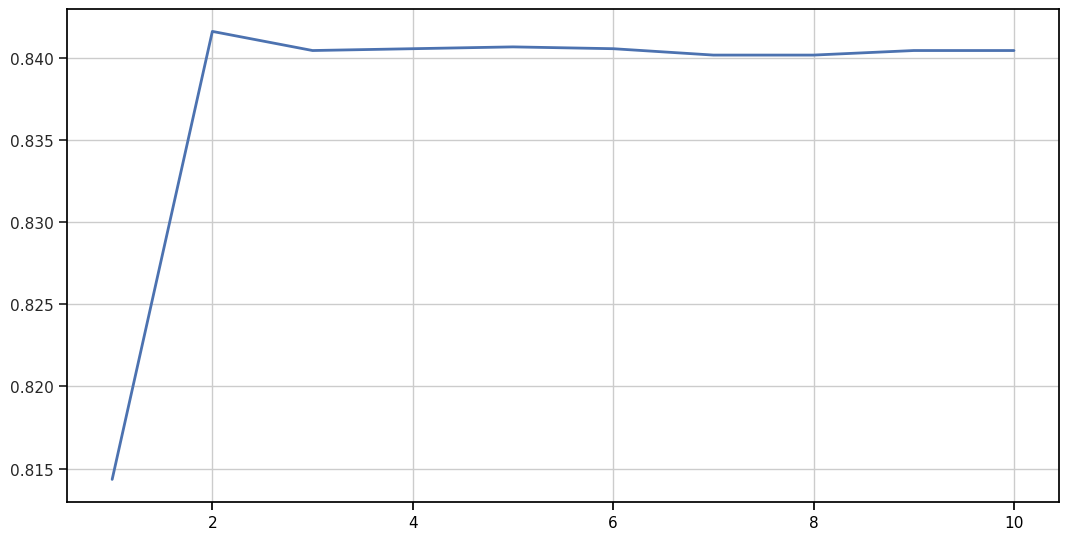

In [ ]:
plot_acc(acc)

In [ ]:
print(gcn_node_model)
#X, A, y  = a.__getitem__(0)

#print(X)
for _, (X,A,y) in enumerate(aa):
    print(y[0])
    break
with torch.no_grad():
    y_pred = gcn_node_model(X, A)
    print(y, torch.sigmoid(y_pred))
    #print(y, y_pred[0] > 0)
    tracker.update(y[0], y_pred[0] > 0)

tracker.compute()

GCNNodeClassifier(
  (output_layer): Linear(in_features=23, out_features=1, bias=True)
)
tensor([[1.],
        [1.],
        [1.],
        [0.],
        [1.],
        [0.],
        [1.],
        [0.],
        [1.],
        [0.],
        [1.],
        [1.],
        [1.]])
tensor([[[1.],
         [1.],
         [1.],
         [0.],
         [1.],
         [0.],
         [1.],
         [0.],
         [1.],
         [0.],
         [1.],
         [1.],
         [1.]]]) tensor([[[0.2441],
         [0.9786],
         [0.9681],
         [0.0973],
         [0.4837],
         [0.0434],
         [0.7993],
         [0.0484],
         [0.9853],
         [0.0874],
         [0.8330],
         [0.7866],
         [0.5888]]])


tensor(0.7978)

##### Edge Classification Network

Represent edge bynode features of the two atoms connected, bond featues, and status-realted features, such as collsion energy.

Concatenate atom features by multiplication of helper matrices A<sub>L</sub> and A<sub>R</sub>, which extract from the respective edge indices the correct node features left and right of the edge.

In [ ]:
class BondAromaticityData(Dataset):
    def __init__(self) -> None:

        edge_connected_node_features = df_nist.apply(lambda x: self.concatenate_node_features(x), axis = 1)
        self.X = np.concatenate(edge_connected_node_features.values, dtype='float32')
        self.y = np.concatenate(df_nist["edges_is_aromatic"].values*1, dtype='float32')
    
        # ADD label to input features
        # self.X = [np.append(self.X[i], self.y[i]) for i in range(len(self))]
    
    def concatenate_node_features(self, d):
        return np.concatenate([d['AL']@d['features'], d['AR']@d['features']], axis=1)
        

    def __len__(self):
        return len(self.X)

    def __getitem__(self, idx): 
        return [self.X[idx], self.y[idx]]

    def num_features(self):
        return self.X.shape[1]

#test_x = df_nist.iloc[0]

#X_x = np.concatenate([test_x['AL']@test_x['features'], test_x['AR']@test_x['features']], axis=1)
#X_x.shape


In [ ]:
model = MLPEdgeClassifier(23, 0, 0)
training_data = BondAromaticityData()
optimizer = torch.optim.SGD(model.parameters(), momentum = 0.9, lr=0.01)
loss_fn = torch.nn.BCEWithLogitsLoss() #Alternatively for sigmoid use torch.nn.BCELoss()
tracker = MetricTracker(Accuracy(num_classes=1))
train(model, DataLoader(training_data, batch_size=64), optimizer=optimizer, loss_fn=loss_fn, epochs=3, tracker=tracker)

Epoch 1/3
Avg. training loss 0.2780
Accuracy: 0.8702
Epoch 2/3
Avg. training loss 0.2762
Accuracy: 0.8702
Epoch 3/3
Avg. training loss 0.2744
Accuracy: 0.8710


0.2743738958666665

Blank










In [ ]:
from modules.MOL.FragmentationTree import FragmentationTree
importlib.reload(modules.MOL.FragmentationTree)

FT = FragmentationTree(x["MOL"])
#frag.build_fragmentation_tree_by_rotatable_bond_breaks()
FT.build_fragmentation_tree(x["MOL"], x.edges_idx, depth=1)

x_matches = FT.match_peak_list(df_nist.loc[EXAMPLE_ID]["peaks"]["mz"])

print(len(x_matches.keys()))
for x in x_matches.keys():
    print(len(x_matches[x]))

In [ ]:
fig, axs = plt.subplots(1, 2, figsize=(12.8, 6.4), gridspec_kw={'width_ratios': [1, 3]}, sharey=False)

img = Chem.Draw.MolToImage(x["MOL"], ax=axs[0])

axs[0].grid(False)
axs[0].tick_params(axis='both', bottom=False, labelbottom=False, left=False, labelleft=False)
axs[0].set_title(x["Name"]+ " structure:\n" + Chem.MolToSmiles(x["MOL"]))
axs[0].imshow(img)
axs[0].axis("off")
sv.plot_spectrum(title=x["Name"] + " MS/MS spectrum", spectrum=x, ax=axs[1])
axs[1].text(100, 0.20, 'GeeksforGeeks', style ='italic',
        fontsize = 30, color ="green")


print("m/z", x["peaks"]["mz"])
print("Int", x["peaks"]["intensity"])
print("\nCreate Fragmentation Tree (depth = 1)\n")
print(FT)
#print(t.size(level=0), t.size(level=1))# t.size(level=2))

mols = [x["MOL"], FT.get_fragment(3), FT.get_fragment(10), FT.get_fragment(7)]

Chem.Draw.MolsToGridImage(mols, molsPerRow=4, useSVG=True, legends=[f' mol ({Chem.Descriptors.ExactMolWt(m)})' for m in mols])

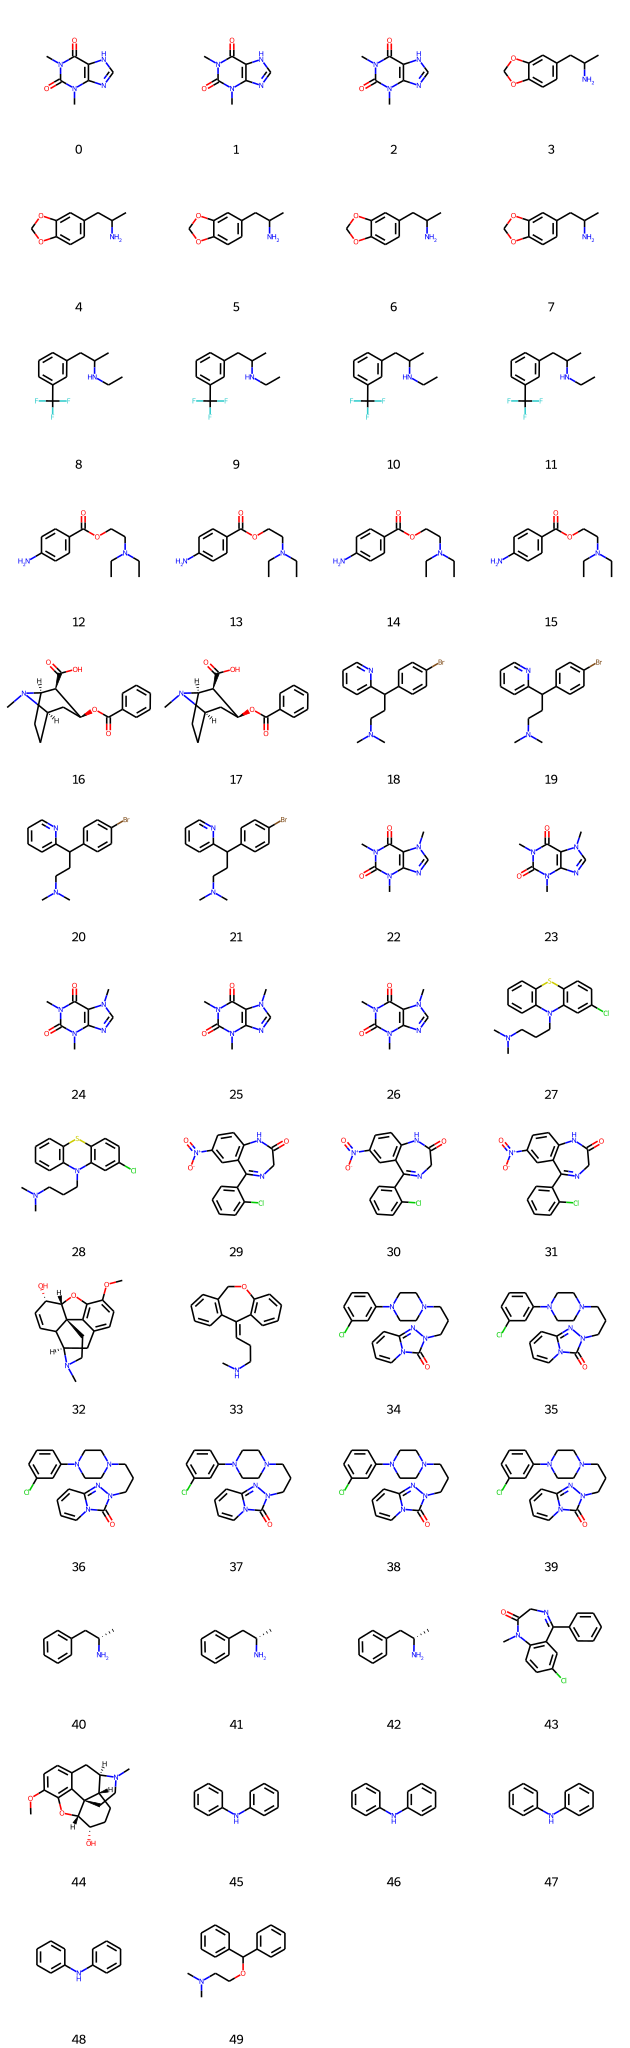

In [ ]:
#
# TODO ::::::::::::::::::::::::::::::::::::: CONTINUE ::::::::::::::::::::::::::::::::::::::::::
#

Chem.Draw.MolsToGridImage([df_nist.iloc[i]["MOL"] for i in range(50)], molsPerRow=4, useSVG=True, legends=[str(i) for i in range(50)]) #

In [ ]:

n = df_nist.iloc[40].Name
print(n)
df_nist[df_nist.Name==n][["CE", "Num peaks", "peaks"]]


D-(+)-Amphetamine


,CE,Num peaks,peaks
695,1.0,4,"{'mz': [91.0, 119.0, 135.0, 136.0], 'intensity..."
696,10.0,3,"{'mz': [91.0, 119.0, 136.0], 'intensity': [999..."
699,40.0,11,"{'mz': [41.0, 51.0, 63.0, 64.0, 65.0, 76.0, 77..."
495909,1.0,3,"{'mz': [91.0539, 119.0855, 136.112], 'intensit..."
495910,2.0,3,"{'mz': [91.054, 119.0855, 136.112], 'intensity..."
495911,3.0,3,"{'mz': [91.054, 119.0855, 136.1121], 'intensit..."
495912,5.0,3,"{'mz': [91.054, 119.0855, 136.1121], 'intensit..."
495913,8.0,4,"{'mz': [91.054, 119.0855, 136.0506, 136.112], ..."
495914,10.0,4,"{'mz': [91.054, 119.0855, 136.0506, 136.1121],..."
495915,13.0,3,"{'mz': [91.054, 119.0855, 136.1121], 'intensit..."


In [ ]:
EXAMPLE_2_ID = 495920



x = df_nist.loc[EXAMPLE_2_ID]

#print(x)

FT = FragmentationTree()
FT.build_fragmentation_tree_by_single_edge_breaks(x["MOL"], x.edges_idx, depth=1)

#print(Chem.Descriptors.ExactMolWt(x["MOL"]))
#print(Chem.Descriptors.ExactMolWt(t.get_node(6).data))

fig, axs = plt.subplots(1, 2, figsize=(12.8, 6.4), gridspec_kw={'width_ratios': [1, 3]}, sharey=False)

img = Chem.Draw.MolToImage(x["MOL"], ax=axs[0])

axs[0].grid(False)
axs[0].tick_params(axis='both', bottom=False, labelbottom=False, left=False, labelleft=False)
axs[0].set_title(x["Name"]+ " structure:\n" + Chem.MolToSmiles(x["MOL"]))
axs[0].imshow(img)
axs[0].axis("off")
sv.plot_spectrum(title=x["Name"] + " MS/MS spectrum", spectrum=x, ax=axs[1])
axs[1].text(100, 0.20, 'GeeksforGeeks', style ='italic',
        fontsize = 30, color ="green")


print("m/z", x["peaks"]["mz"])
print("Int", x["peaks"]["intensity"])
print("\nCreate Fragmentation Tree (depth = 1)\n")
t.show(idhidden=False)
#print(t.size(level=0), t.size(level=1))# t.size(level=2))

Chem.Draw.MolsToGridImage([x["MOL"], t.get_node(1).data, t.get_node(4).data, t.get_node(5).data], molsPerRow=4, useSVG=True, legends=["intact", f"frag ({t.get_node(1).tag:.03f})", f"frag ({t.get_node(4).tag:.03f})", f"frag ({t.get_node(5).tag:.03f})"])

In [ ]:
import modules.MS.ms_utility as msutil
importlib.reload(modules.MS.ms_utility)
importlib.reload(modules.MOL.FragmentationTree)


In [ ]:
for off in offsets:
    print(off, ":", np.mean(D[str(off)]["peaks"]), np.mean(D[str(off)]["unique"]), np.mean(D[str(off)]["percentage"]))

0 : 0.5546 0.4611 0.04162517126860168
1.007276 : 0.9278 0.8791 0.08156156802422809
-1.007276 : 2.67425 2.18135 0.2575184985600713
4.6 : 0.00025 0.0002 1.0656377935789702e-05


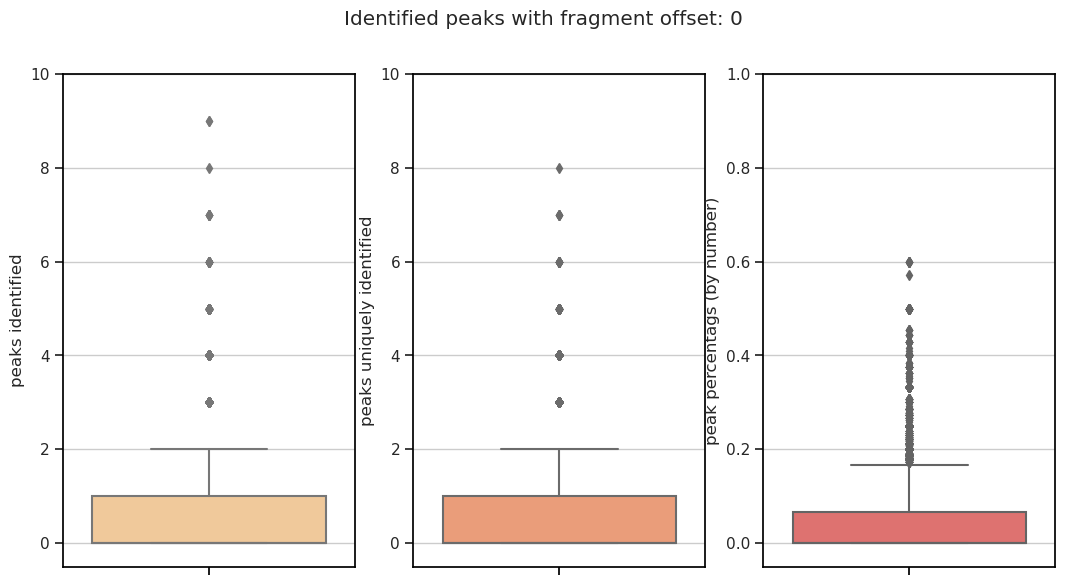

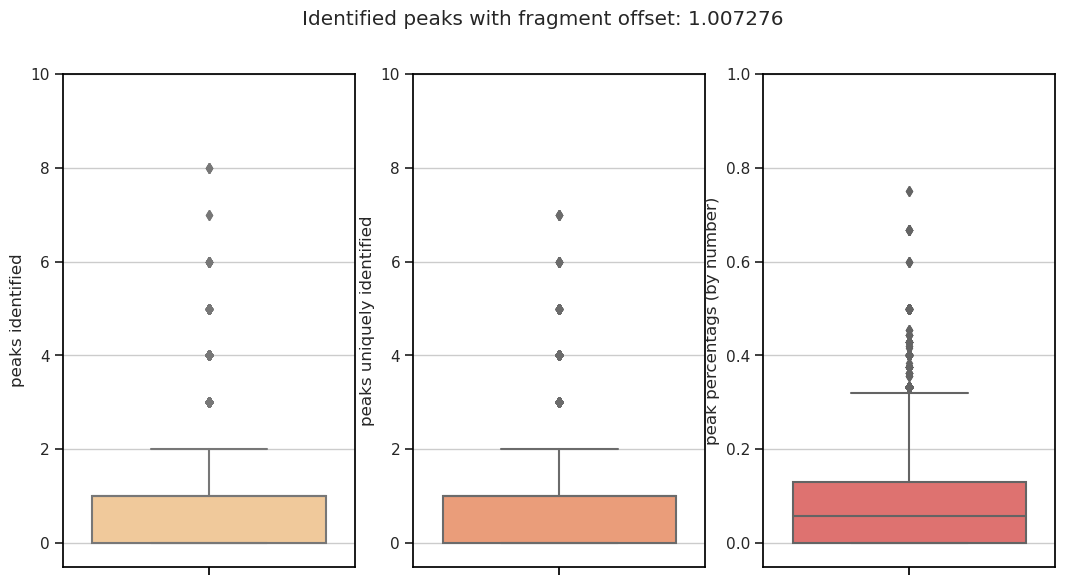

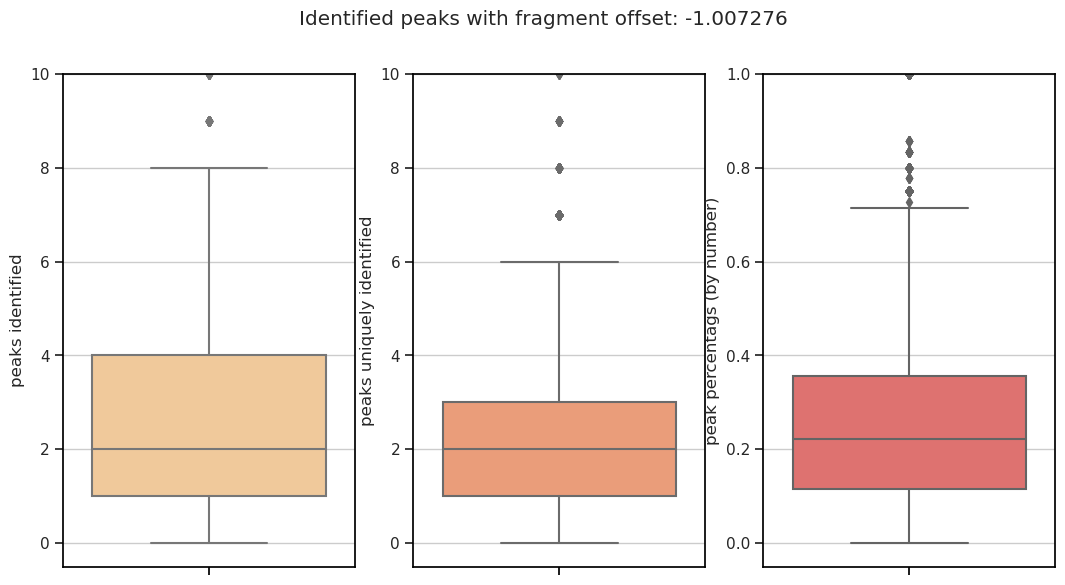

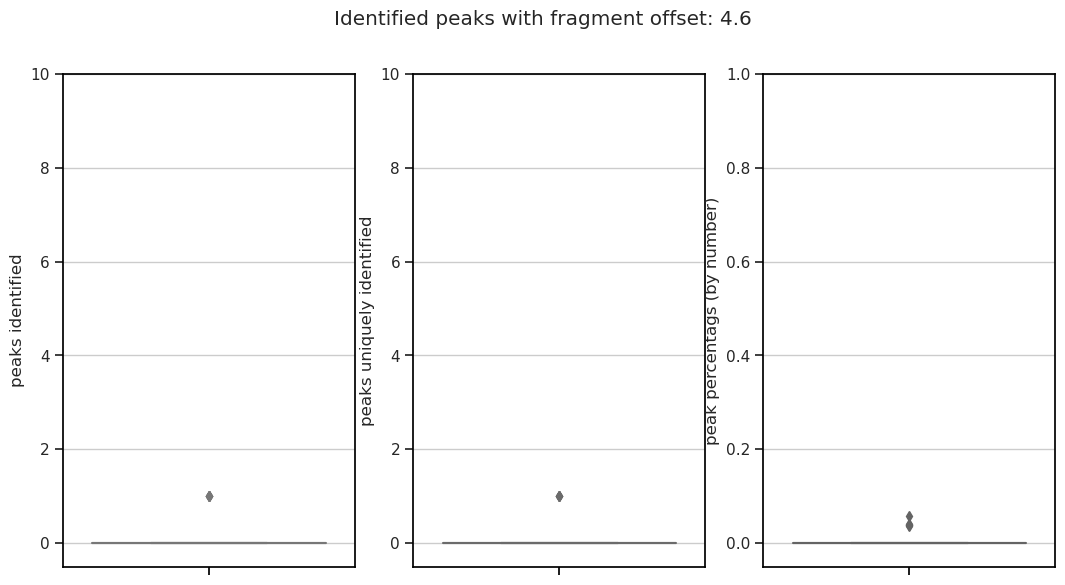

In [ ]:
#sns.boxplot(y=D[str(off)]["peaks"], palette=color_palette)
#plt.show()
for off in offsets:
    fig, axs = plt.subplots(1, 3, figsize=(12.8, 6.4), sharey=False)

    fig.suptitle(f"Identified peaks with fragment offset: {str(off)}")
    #plt.title(f"Identified peaks with fragment offset: {str(off)}")
    sns.boxplot(ax=axs[0], y=D[str(off)]["peaks"], color=color_palette[0])
    axs[0].set_ylim(-0.5, 10)
    axs[0].set_ylabel("peaks identified")
    sns.boxplot(ax=axs[1], y=D[str(off)]["unique"], color=color_palette[1])
    axs[1].set_ylim(-0.5,10)
    axs[1].set_ylabel("peaks uniquely identified")
    sns.boxplot(ax=axs[2], y=D[str(off)]["percentage"], color=color_palette[2])
    axs[2].set_ylim(-0.05,1.0)
    axs[2].set_ylabel("peak percentags (by number)")
    plt.show()


In [ ]:
print(zigzagerrorhack)
frame = PandasTools.LoadSDF(library_directory + library_name + ".SDF",smilesName='SMILES',molColName='Molecule', includeFingerprints=True)

frame.info 

In [ ]:
# structure library
structure_supplier = Chem.SDMolSupplier(library_directory + library_name + ".SDF")
print(structure_supplier)
nist_mols = [structure_supplier[i] for i in range(0,100)] #TODO use all
df_nist = pd.DataFrame()
df_nist['mol'] = nist_mols
df_nist.dropna(inplace=True)

df_nist['smiles'] = df_nist['mol'].apply(lambda x: Chem.MolToSmiles(x))

df_nist.head()

In [ ]:


'''

hmdb_supplier = Chem.SDMolSupplier(f'{home}/data/metabolites/HMDB/structures.sdf')
hmdb_mols = [hmdb_supplier[i] for i in range(0,100)] #TODO use all
df = pd.DataFrame()
df['mol'] = hmdb_mols
df.dropna(inplace=True)

df['smiles'] = df['mol'].apply(lambda x: Chem.MolToSmiles(x))

df.head()
'''

Model molecules as a graph using *networkx* library.

In [ ]:
import networkx as nx

color_map = {'C': 'gray',
             'O': 'red',
             'N': 'blue'}

def mol_to_nx(mol):
    G = nx.Graph()

    for atom in mol.GetAtoms():
        color = color_map[atom.GetSymbol()] if atom.GetSymbol() in color_map.keys() else 'black'
        G.add_node(atom.GetIdx(),
                   atomic_num=atom.GetAtomicNum(),
                   is_aromatic=atom.GetIsAromatic(),
                   atom_symbol=atom.GetSymbol(),
                   color=color,
                   atom=atom)

    for bond in mol.GetBonds():
        G.add_edge(bond.GetBeginAtomIdx(),
                   bond.GetEndAtomIdx(),
                   bond_type=bond.GetBondType(),
                   bond=bond)
                   #is_double=bond.GEt)

    return G

def draw_graph(G, edge_labels=False):
    pos = nx.spring_layout(G)
    nx.draw(G,pos=pos,
        labels=nx.get_node_attributes(G, 'atom_symbol'),
        with_labels = True,
        node_color=list(nx.get_node_attributes(G, 'color').values()),
        node_size=800)
    if edge_labels:
        nx.draw_networkx_edge_labels(
            G, pos,
            edge_labels=dict([((n1, n2), f'({n1}, {n2})')
                    for n1, n2 in G.edges]),
        font_color='red')
    plt.show()


class FeatureEncoder:
    def __init__(self):
        self.encoded_dim = 0
        self.sets = {
            "symbol": {"B", "Br", "C", "Ca", "Cl", "F", "H", "I", "N", "Na", "O", "P", "S"},
            "num_hydrogen": {0, 1, 2, 3, 4, 5, 6, 7, 8}
        }
        self.reduced_features = ["symbol"] # Where unknown variables (not in the set) might occur, these will get a combined bit in the encoded vector
        self.one_hot_mapper = {}
        for feature in self.sets.keys():
            variables = self.sets[feature]
            self.one_hot_mapper[feature] = dict(zip(variables, range(self.encoded_dim, len(variables) + self.encoded_dim)))
            self.encoded_dim += len(variables)
            if feature in self.reduced_features:
                self.encoded_dim += 1

    def encode(self, G):
        feature_matrix = np.zeros(shape=(G.number_of_nodes(), self.encoded_dim))

        for i in range(G.number_of_nodes()):
            atom = G.nodes()[i]['atom']

            if not atom.GetSymbol() in self.sets['symbol']:
                feature_matrix[i][self.one_hot_mapper['symbol'][list(self.sets['symbol'])[-1]] + 1] = 1.0
            else:
                feature_matrix[i][self.one_hot_mapper['symbol'][atom.GetSymbol()]] = 1.0

            feature_matrix[i][self.one_hot_mapper['num_hydrogen'][atom.GetTotalNumHs()]] = 1.0

        return feature_matrix

node_encoder = FeatureEncoder()

Prepare graph information for the entire dataset and compute relevant matrices (X,A,A~,y)

In [ ]:
num_elems = 12
def add_dataframe_features(df):
    df['graph'] = df['mol'].apply(mol_to_nx)
    df['features'] = df['graph'].apply(lambda x: node_encoder.encode(x))
    df['Xsymbol'] = df['graph'].apply(lambda x: [x.nodes[atom]['atom_symbol'] for atom in x.nodes()])
    df['Xi'] = df['graph'].apply(lambda x: [min(x.nodes[atom]['atomic_num'], num_elems - 1) for atom in x.nodes()])
    df['X'] = df['Xi'].apply(lambda x: to_categorical(x, num_classes=num_elems))
    df['A'] =  df['graph'].apply(nx.convert_matrix.to_numpy_matrix)
    df['Atilde'] =  df['A'].apply(lambda x: x + np.eye(N=x.shape[0]))
    df['Id'] = df['A'].apply(lambda x: np.eye(N=x.shape[0]))
    df['deg'] = df['A'].apply(lambda x: tf.transpose([tf.clip_by_value(tf.reduce_sum(x, axis=-1), 0.0001, 1000.0)]))
    df['isAromatic'] = df['graph'].apply(lambda x: np.array([[x.nodes[atom]['is_aromatic'] for atom in x.nodes()]]).T)

    # Extras
    df['isN'] = df['graph'].apply(lambda x: np.array([[int(x.nodes[atom]['atom_symbol'] == 'N') for atom in x.nodes()]]))
    df['isN_in_radius1'] = [df.loc[i, 'Atilde'] * df.loc[i,'isN'].T for i in df.index]
    df['isN_in_radius1'] = df['isN_in_radius1'].apply(lambda x: x.clip(0, 1))
    df['isN_neighboring'] = [df.loc[i, 'A'] * df.loc[i,'isN'].T for i in df.index]
    df['isN_neighboring'] = df['isN_neighboring'].apply(lambda x: x.clip(0, 1))
    return df
df_nist = add_dataframe_features(df_nist)

### GCN framework
<font size="2">*This is a textual outline; terms and descriptions are not necessarily mathematically exact.*</font>

The conceptual idea is to transform node features H by convolution with features of its neighbors: $$H' = \sigma(AHW)$$, where $W$ is a weight matrix (linear transformation), $A$ the adjacency matrix and $\sigma$ a non-linearity. Depending on $A$, this framework allows simple graph convolution, such as sum-pooling (using $A = A + Id$) or mean-pooling (normalized by matrix degree $A = A / deg(A)$).

This model however, aggregates information of neighbors equally to the node's individual information. In order to learn  features of a node's identity distinctly, and put it in relation to neighboring nodes, the framework needs to be extended: $$H' = \sigma(HV + AHW)$$, where V is another learnable weight matrix that transforms H separately from the information aggregated from the neighbors. See *tensorflow* implementation below:

$$H^{(l)} = \sigma(HW_1 + AHW_2)$$
$$h_i' = \sigma(\sum_{j\in N_i} Wh_j)$$


In [ ]:
# idea: H' = sigmoid(AHW) with adjacency matrix A, feature matrix H, and weight matrix W (linear transformation)
def gnn_pool(features, A, transform, activation):
    HW = transform(features)
    AHW = tf.matmul(A, HW)

    return activation(AHW)

def gnn(features, A, self_transform, transform, activation):
    HW = transform(features)
    AHW = tf.matmul(A, HW)
    HV = self_transform(features)

    return activation(tf.add(HV, AHW))

Define suitable GNN and train simple node-classification task

In [ ]:
layer_conv1, layer_self1 = tf.keras.layers.Dense(num_elems), tf.keras.layers.Dense(num_elems)
layer_conv2, layer_self2 = tf.keras.layers.Dense(num_elems), tf.keras.layers.Dense(num_elems)
layer_conv3, layer_self3 = tf.keras.layers.Dense(num_elems), tf.keras.layers.Dense(num_elems)
layer_conv4, layer_self4 = tf.keras.layers.Dense(num_elems), tf.keras.layers.Dense(num_elems)
layer_conv5, layer_self5 = tf.keras.layers.Dense(num_elems), tf.keras.layers.Dense(num_elems)
layer_final = tf.keras.layers.Dense(1)

def gnn_pooling_model(features, A):
        hidden_features = gnn_pool(features, A, layer_conv1, activation=tf.nn.relu)
        output_logits = layer_final(hidden_features) #= gnn(hidden_features, A, layer_2, activation=tf.identity)#tf.nn.sigmoid)#tf.identity)
        return output_logits

def gnn_model(features, A):
    hidden_features = gnn(features, A, layer_self1, layer_conv1, tf.nn.relu)
    hidden_features = gnn(hidden_features, A, layer_self2, layer_conv2, tf.nn.relu)
    hidden_features = gnn(hidden_features, A, layer_self3, layer_conv3, tf.nn.relu)
    hidden_features = gnn(hidden_features, A, layer_self4, layer_conv4, tf.nn.relu)
    hidden_features = gnn(hidden_features, A, layer_self5, layer_conv5, tf.nn.relu)
    output_logits = layer_final(hidden_features)
    return output_logits

In [ ]:
def accuracy_logits(y, yhat):
    return sklearn.metrics.accuracy_score(y, [x > 0 for x in yhat])

def validate_model(data, model, y_label, verbose=False, **kwargs):
    losses, y_true, y_hat = [], [], []
    correct_mol = 0
    for i in data.index:
        d = data.loc[i]
        model_kwargs = {}
        for key, value in kwargs.items():
            model_kwargs[key] = tf.cast(d[value], dtype=tf.float32)
        logits = model(d.features, tf.cast(d.A / d.deg, dtype=tf.float32), **model_kwargs)
        #logits = model(d.features, tf.cast(d.Id, dtype=tf.float32), **model_kwargs)
        y_tensor = tf.cast(d[y_label], dtype=tf.float32)
        loss = tf.nn.sigmoid_cross_entropy_with_logits(y_tensor, logits)

        losses = np.append(losses, loss.numpy())
        y_hat += [float(x) > 0 for x in logits]
        y_true += [int(x) for x in y_tensor]
        if y_hat[-len(logits):] == y_true[-len(logits):]:
            correct_mol+=1

    acc, mean_loss = sklearn.metrics.accuracy_score(y_true, y_hat), np.mean(losses)
    if verbose: print("Node/Edge level accuracy: %.03f; Mean loss: %.03f; Correct molecules: %.03f" % (acc, mean_loss, correct_mol / data.shape[0]))

    return acc, mean_loss, correct_mol / data.shape[0]

def train_gnn(data):

    optimizer = tf.keras.optimizers.Adam(learning_rate=0.01)
    data_train, data_val = train_test_split(data, test_size=0.1)
    for epoch in range(1, 6):
        for i in data_train.index:
            with tf.GradientTape() as t:
                d = data_train.loc[i]
                #logits = gnn_pooling_model(d.features, tf.cast(d.Atilde, dtype=tf.float32))
                logits = gnn_model(d.features, tf.cast(d.A / d.deg, dtype=tf.float32))
                loss = tf.nn.sigmoid_cross_entropy_with_logits(tf.cast(d.isAromatic, dtype=tf.float32), logits)

            variables = t.watched_variables()
            gradients = t.gradient(loss, variables)
            optimizer.apply_gradients(zip(gradients, variables))

        # Validate loss/acc
        print("Epoch %s" % epoch)
        validate_model(data=data_val, model=gnn_model, y_label="isAromatic", verbose=True)

    return

In [ ]:
df_train, df_test = train_test_split(df_nist, test_size=0.5)
train_gnn(df_train)

In [ ]:
print("Test GNN")
acc, loss, correct = validate_model(df_test, gnn_model, "isAromatic", verbose=True)
#print()

Testing some molecules

In [ ]:
d = df_nist.iloc[4]
d.mol

In [ ]:

yhat = gnn_model(d.features, tf.cast(d.A / d.deg, dtype=tf.float32))
ytrue = tf.cast(d.isAromatic, dtype=tf.float32)

print("  y   y_hat  ")
print(np.round(np.array(tf.concat([ytrue, tf.nn.sigmoid(yhat)], axis=1)), decimals=2))



### Edge classification model

We stick to node-centered graph convolutions for now, but try to predict edge features by pairing nodes in the final prediction layers.

First we define helper matrices $A_L$ and $A_R$ to retrieve features ($H$) from nodes connected by edges (by one-hot encoded matrix look-up).  This way the concatenation $(A_L H \  A_R H)$ corresponds to features for edge classification. At the same time, we define the prediction property $y$ for each corresponding edge.

In [ ]:
def compute_helper_matrices(A, deg, G):
    AL = np.zeros(shape=(int(tf.reduce_sum(deg).numpy()), A.shape[0]))
    AR = np.zeros(shape=AL.shape)
    y_edge = []
    edge_idx = []

    row = 0
    for j in range(deg.shape[0]):
        row_degree = int(deg[j,0].numpy())
        for i in range(row_degree):
            edges_to = np.where(A[j] > 0.001)[1]
            AL[row + i, j] = 1.0
            AR[row + i, edges_to[i]] = 1.0
            y_edge.append(G[j][edges_to[i]]['bond_type'].name == "AROMATIC") # Add y condition here
            edge_idx.append((j, edges_to[i]))
        row += row_degree

    return AL, AR, y_edge, edge_idx

def add_dataframe_edge_features(df):
    df['AL'] = df.apply(lambda x: compute_helper_matrices(x['A'], x['deg'], x['graph']), axis=1)
    df['AR'] = df['AL'].apply(lambda x: x[1])
    df['edges_is_aromatic'] = df['AL'].apply(lambda x: np.array([x[2]]).T)
    df['edges_idx'] = df['AL'].apply(lambda x: x[3])
    df['AL'] = df['AL'].apply(lambda x: x[0])
    return df

df_nist = add_dataframe_edge_features(df_nist)


In [ ]:
edge_prediction_layer = tf.keras.layers.Dense(1)

def edge_pred(features, AL, AR, transform, activation):
    X = tf.concat([tf.matmul(AL, features), tf.matmul(AR, features)], axis=1)

    return activation(transform(tf.cast(X, dtype=tf.float32)))

def edge_prediction_model(features, A, AL, AR):
    hidden_features = gnn(features, A, layer_self1, layer_conv1, tf.nn.relu)
    hidden_features = gnn(hidden_features, A, layer_self2, layer_conv2, tf.nn.relu)
    hidden_features = gnn(hidden_features, A, layer_self3, layer_conv3, tf.nn.relu)
    hidden_features = gnn(hidden_features, A, layer_self4, layer_conv4, tf.nn.relu)
    hidden_features = gnn(hidden_features, A, layer_self5, layer_conv5, tf.nn.relu)
    output_logits = edge_pred(hidden_features, AL, AR, edge_prediction_layer, tf.identity)
    return output_logits


def train_edge_gnn(data):

    optimizer = tf.keras.optimizers.Adam(learning_rate=0.01)
    data_train, data_val = train_test_split(data, test_size=0.1)

    for epoch in range(1, 6):
        L=[]
        for i in data_train.index:
            with tf.GradientTape() as t:
                d = data.loc[i]
                if d.graph.number_of_edges() == 0:
                    continue
                logits = edge_prediction_model(d.features, tf.cast(d.A / d.deg, dtype=tf.float32), tf.cast(d.AL, dtype=tf.float32), tf.cast(d.AR, dtype=tf.float32))
                #logits = edge_prediction_model(d.features, tf.cast(d.Id, dtype=tf.float32), tf.cast(d.AL, dtype=tf.float32), tf.cast(d.AR, dtype=tf.float32))
                y_tensor = tf.cast(d.edges_is_aromatic, dtype=tf.float32)
                loss = tf.nn.sigmoid_cross_entropy_with_logits(y_tensor, logits)
                L.append(np.mean(loss))
            variables = t.watched_variables()
            gradients = t.gradient(loss, variables)
            optimizer.apply_gradients(zip(gradients, variables))

         # Validate loss/acc
        print("Epoch %s" % epoch)
        validate_model(data=data_val, model=edge_prediction_model, y_label="edges_is_aromatic", verbose=True, AL="AL", AR="AR")

    return

In [ ]:
df_train, df_test = train_test_split(df_nist, test_size=0.5) # Redo since df has been change
train_edge_gnn(df_train) #TODO test train

In [ ]:
print("Test Edge GNN")
acc, loss, correct = validate_model(data=df_test, model=edge_prediction_model, y_label="edges_is_aromatic", verbose=True, AL="AL", AR="AR")

In [ ]:
d = df_nist.iloc[4]
yhat = edge_prediction_model(d.features, tf.cast(d.A / d.deg, dtype=tf.float32), tf.cast(d.AL, dtype=tf.float32), tf.cast(d.AR, dtype=tf.float32))
ytrue = tf.cast(d.edges_is_aromatic, dtype=tf.float32)
print(np.round(np.array(tf.concat([ytrue, tf.nn.sigmoid(yhat)], axis=1)), decimals=2))
d.mol

In [ ]:
G = mol_to_nx(d.mol)

for i in range(tf.cast(d.A, dtype=tf.float32).shape[0]):
    for j in range(tf.cast(d.A, dtype=tf.float32).shape[1]):
        if d.A[i,j] >= 1:
            print(G[i][j]['bond'].GetBondType())

In [ ]:
def break_bond(mol, i,j):
    em = Chem.EditableMol(mol)
    em.RemoveBond(i, j)
    new_mol = em.GetMol()
    frags = Chem.GetMolFrags(new_mol,asMols=True)
    return new_mol, frags

dummy = df_nist.iloc[12]
#print(dummy)
#dummy.mol

#print(dummy.A)
#print(dummy.Xsymbol)
draw_graph(dummy.graph, edge_labels=True)


new_mol, fragments = break_bond(dummy.mol, 0, 6)

new_mol


In [ ]:


nicotine_mol = Chem.MolFromSmiles("NCCCCC(N)CC(O)=O")
print(Descriptors.ExactMolWt(nicotine_mol) + 1)
G = mol_to_nx(nicotine_mol)
draw_graph(G, edge_labels=True)
new_mol, fragments = break_bond(nicotine_mol, 3, 4)
print([Descriptors.ExactMolWt(f) +1 for f in fragments])
new_mol

In [ ]:
# Define CONSTANTS
MZ_TOLERANCE = 0.1
PROTON_MZ = 1.007
d = df_nist.iloc[1]
def getIonWeights(mol, y_idx, charge):
    weight = []
    for i,j in y_idx:

        #[] TODO which weight is which fragment?
        try:
            new_mol, fragments = break_bond(mol, int(i), int(j))
        except (Chem.AtomKekulizeException, Chem.KekulizeException):
            #print(i,j, "Error", Chem.AtomKekulizeException)
            weight.append([np.nan, np.nan])
        else:
            #print(i,j,[Descriptors.ExactMolWt(f) + charge for f in fragments])
            if len(fragments) > 1:
                weight.append([Descriptors.ExactMolWt(f) + (PROTON_MZ * charge) for f in fragments])
            else:
                weight.append([np.nan, np.nan])
    return weight


print(d.edges_idx)
w = getIonWeights(d.mol, d.edges_idx, 1)
print(w)
np.unique(w)


In [ ]:
draw_graph(d.graph,edge_labels=True)

### Spectral Library
Load MassBank (*NIST.msp*)

In [ ]:
# spectral library
nist_msp = mspReader.read(f"{home}/data/metabolites/MassBank/MassBank_NIST.msp")
df = pd.DataFrame(nist_msp)
df['mol'] = df['SMILES'].apply(Chem.MolFromSmiles)
df.dropna(inplace=True)
print(df.shape)


In [ ]:


d = df.loc[181]

print(d)
d.mol
#df_nist

In [ ]:
print(df.columns)
sns.histplot(df.Ion_mode)
plt.show()


sns.histplot(df.Instrument_type)
plt.show()
print(df.Precursor_type.unique())
print(df.Instrument_type.unique())
print(df.Collision_energy.unique())
print(sum(df.Collision_energy=="30(NCE)"))
sns.histplot(df.Collision_energy)
plt.show()

Process Data. Filter Ion Mode, Precursor type, Num of peaks and allow only MS2 spectra. Add additional information regarding molecular graph and matrices

In [ ]:
df = df[df.Ion_mode == 'POSITIVE']
df = df[df.Precursor_type == '[M+H]+']
df = df[df.Spectrum_type == 'MS2']
df = df[df.Instrument_type == "LC-ESI-ITFT"]
df['Num Peaks'] = df['Num Peaks'].astype(int)
df = df[df['Num Peaks'] > 1]
print(df.shape)
#df_nist = df_nist.iloc[:1000] # Reduce to 1000


df = add_dataframe_features(df)
df = add_dataframe_edge_features(df)


def NCE_to_eV(NCE, isolation_center, charge): # isolation_ceter = precursor mz (???)
    return (NCE * isolation_center) / (500 * charge) # NCE seems to be calibrated to 500 m/z ions (???)

def eV_to_NCE(eV):
    return None

NCEs = []

print(any([abs((float(df.loc[x, 'ExactMass']) - Descriptors.ExactMolWt(df.loc[x, 'mol']))  > 0.2) for x in df.index]))
print(sum([abs((float(df.loc[x, 'PrecursorMZ']) - (Descriptors.ExactMolWt(df.loc[x, 'mol']) + PROTON_MZ))  > 0.2) for x in df.index]))

#
# Adjust types and assess specific features
#

df['PrecursorMZ'] = df['PrecursorMZ'].astype('float32')
df['theoretical_PrecursorMZ'] = df['mol'].apply(lambda x: Descriptors.ExactMolWt(x) + PROTON_MZ)
df['PrecursorMZ_difference'] = df['PrecursorMZ'] - df['theoretical_PrecursorMZ']
df['absPrecursorMZ_difference'] = df['PrecursorMZ_difference'].apply(abs)

df = df[df.absPrecursorMZ_difference < MZ_TOLERANCE]

print(df.shape)




In [ ]:
d = df.loc[181]

#d['graph']
draw_graph(d.graph)



In [ ]:
from treelib import Node, Tree
from copy import copy

def create_fragments(mol, i, j):
    try:
        new_mol, fragments = break_bond(mol, int(i), int(j))
    except (Chem.AtomKekulizeException, Chem.KekulizeException):
            #print(i,j, "Error", Chem.AtomKekulizeException)
        new_mol = None
        fragments = [None, None]
    else:
        if len(fragments) < 1:
            #TODO resolve ring break
            fragments = [fragments[0], None]
    return new_mol, fragments

#
# TODO DOOOOOOOOOO
#

def morganFinger(x):
    return AllChem.GetMorganFingerprintAsBitVect(x, 2, nBits=1024)

def equalMols(mol, other):

    funcs = [Chem.Descriptors.ExactMolWt, morganFinger, AllChem.GetMACCSKeysFingerprint]
    #func = Chem.Descriptors.ExactMolWt # TODO add more here !!!!! When are mols equal????
    for func in funcs:
        if func(mol) == func(other):
            continue
        else:
            return False
    return True

def is_fragment_in_list(fragment, fragment_list):
    for f in fragment_list:
        if equalMols(fragment, f):
            return True
    return False

def build_fragmentation_tree(mol, edges, depth=2, parent_tree=None, parent_id=None):
    fragmentation_tree = Tree(tree=parent_tree)
    ID = fragmentation_tree.size()
    fragmentation_tree.create_node(tag=Chem.Descriptors.ExactMolWt(mol), parent=parent_id, identifier=ID, data=mol)


    listed_fragments = []


    for i,j in edges:
        _, fragments = create_fragments(mol, i, j)
        for f in fragments:
            if f is not None:
                if is_fragment_in_list(f, listed_fragments):
                    continue
                if depth == 1: # anchor
                    fragmentation_tree.create_node(tag=Chem.Descriptors.ExactMolWt(f), identifier=fragmentation_tree.size(), parent=ID, data=f)
                else: # recursion TODO OPTIMIZE
                     # build graph, adjacency matrix and index edges
                    G = mol_to_nx(f)
                    A = nx.convert_matrix.to_numpy_matrix(G)
                    deg = tf.transpose([tf.clip_by_value(tf.reduce_sum(A, axis=-1), 0.0001, 1000.0)])
                    _,_,_, edges = compute_helper_matrices(A, deg, G)
                    fragmentation_tree = build_fragmentation_tree(f, edges, depth=depth-1, parent_tree=fragmentation_tree, parent_id=ID)

                listed_fragments.append(f)
    return fragmentation_tree


d = df.loc[181]

t = build_fragmentation_tree(d.mol, d.edges_idx, depth=2)
t.show(idhidden=False)
print(t.size(level=0), t.size(level=1), t.size(level=2))

Chem.Draw.MolsToGridImage([d.mol, t.get_node(20).data, t.get_node(14).data, t.get_node(263).data], molsPerRow=4, useSVG=True, legends=["intact", "fragment 1", "fragment 2", "fragment 3"])

In [ ]:

def do_peaks_match(peak1, peak2, mz_tolerance=MZ_TOLERANCE):
    return abs(peak1 - peak2) < mz_tolerance
#df_nist['num_peaks_matched'] = df_nist.apply(lambda x: sum([any([do_peaks_match(frag_peak, peak) for peak in x['peaks']['mz']]) for frag_peak in x['unique_fragment_mz']]), axis=1)

def does_peak_match_any(peak, peak_list, mz_tolerance=MZ_TOLERANCE):
    return any([do_peaks_match(peak, peak2, mz_tolerance) for peak2 in peak_list])

def match_peak_to_list(peak, peak_list, mz_tolerance=MZ_TOLERANCE):

    for i in range(len(peak_list)):
        if do_peaks_match(peak, peak_list[i], mz_tolerance):
            return i #TODO only reports first match ::TOODODODODO

    return np.nan

def get_matching_peaks_until_depth(tree, peaks, depth):
    fragments = []
    peak_list = []
    intensities = []
    nodes = tree.all_nodes()
    for node in nodes:
        if tree.level(node.identifier) > depth:
            continue
        mz = node.tag + PROTON_MZ
        peak_idx = match_peak_to_list(mz, peaks['mz'])
        if not np.isnan(peak_idx):
            fragments.append((mz, node.identifier, None if node.identifier==0 else tree.parent(node.identifier).identifier))
            if not peaks['mz'][peak_idx] in peak_list:
                peak_list.append(peaks['mz'][peak_idx])
                intensities.append(peaks['intensity'][peak_idx])

    return fragments, peak_list, intensities

print("Spectrum peak list: %s" % d.peaks['mz'])
DEPTH = 2
frags, p, i = get_matching_peaks_until_depth(tree=t, peaks=d.peaks, depth=DEPTH)
print("Identified [M+H]+ fragments at treedepth %s: %s" % (DEPTH, p))
print("Fragment intensities %s" % i)
print("Fragment intensities covered %.02f" % (sum(i) / sum(d.peaks['intensity'])))
#collections.Counter([x[2] for x in frags])

In [ ]:
# 1st order fragmentation
mols = [d.mol, t.get_node(227).data, t.get_node(149).data, t.get_node(263).data]
Chem.Draw.MolsToGridImage(mols, molsPerRow=4, useSVG=True, legends=["mz: %.2f" % (Chem.Descriptors.ExactMolWt(x) + PROTON_MZ) for x in mols])

In [ ]:
# 2nd order fragmentation
print("All possible fragments matching: %s" % frags)
for x in p:
    parents = []
    for f in frags:
        if do_peaks_match(x, f[0]):
            parents.append(f[2])
    print("%s: %s" % (x, parents))
parents = [t.get_node(170).data  ,t.get_node(263).data , t.get_node(227).data]
mols = [t.get_node(171).data, t.get_node(283).data, t.get_node(232).data]

m = parents+mols
Chem.Draw.MolsToGridImage(m, molsPerRow=3, useSVG=True, legends=["mz: %.2f" % (Chem.Descriptors.ExactMolWt(x) + PROTON_MZ) for x in m])

In [ ]:
#s = mspReader.get_spectrum_by_name()
sv.plot_spectrum(d,title="Phacidin MS/MS")

In [ ]:
print(d)

In [ ]:
test = "CCC=CC"
testmol = Chem.MolFromSmiles(test)

test2 = "CC=CCC"
testmol2 = Chem.MolFromSmiles(test2)

test3 = "C=CCCC"
testmol3 = Chem.MolFromSmiles(test3)


print("T/F check:", equalMols(testmol, testmol2), equalMols(testmol2, testmol3))

In [ ]:
s = "CCCCCCCCC(=O)C1=C(C=C(C(=C1O)C=O)O)O"
m = Chem.MolFromSmiles(s)

m


Building fragmentation trees for all molecules. And looking at statistics regarding matched peaks.

In [ ]:
df[df.Name == "Ibuprofen"]
d = df.loc[17152]
d.peaks

In [ ]:
t = build_fragmentation_tree(d.mol, d.edges_idx, depth=2)
t.show(idhidden=False)
print(get_matching_peaks_until_depth(t,d.peaks,depth=2))
t.get_node(56).data

In [ ]:
print(zigzagerrorhack)

df['fragmentation_tree'] = None
df['identified_peaks'] = None
df['identified_peaks_intensities'] = None
df['intensity_covered'] = None
df['num_identified_peaks'] = None


DEPTH = 2
to_be_removed = []
c = 0
for x in df.index:
    if c % 20 == 0:
        print("%.02f%%" % (100 * c/float(df.shape[0])), end='\r')
    d = df.loc[x]
    t = build_fragmentation_tree(d.mol, d.edges_idx, depth=DEPTH)
    frags, p, i = get_matching_peaks_until_depth(tree=t, peaks=d.peaks, depth=DEPTH)
    intensity_covered = sum(i) / sum(d.peaks['intensity'])


    # FILTER: at least 1 peak other than the precursor, at least 0.5 of the total intensity covered
    if len(p) > 1 and intensity_covered > 0.5:
        df.at[x,'fragmentation_tree'] = t
        #df_nist.loc[x,'fragmentation_tree'] = t
        #df_nist.loc[x]['fragmentation_tree'] = t
        df.at[x, 'identified_peaks'] = p
        df.at[x,'identified_peaks_intensities'] = i
        df.at[x,'intensity_covered'] = intensity_covered
        df.at[x,'num_identified_peaks'] = len(p)
    else:
        to_be_removed.append(x)
    c+=1

In [ ]:
print(zigzagerrorhack)

#df_nist.to_csv('./nist_reduced.csv')
df.to_csv(f'{home}/Desktop/nist_reduced.csv')

print("yes")
print(zigzagerrorhack)

Continue here loading the precalculated peak matches ...

In [ ]:
import ast
df = pd.read_csv('./nist_reduced.csv')

df.head()

In [ ]:
df = df[~df['intensity_covered'].apply(np.isnan)]
df['peaks'] = df['peaks'].apply(ast.literal_eval)
df['identified_peaks'] = df['identified_peaks'].apply(ast.literal_eval)
df['identified_peaks_intensities'] = df['identified_peaks_intensities'].apply(ast.literal_eval)
print(df.shape)


In [ ]:

def find_precursor_peak_idx(precursor_mz, peaks):
    for i in range(len(peaks)):
        if do_peaks_match(peaks[i], precursor_mz):
            return i
    return -1


df['precursor_peak_idx'] = df.apply(lambda x: find_precursor_peak_idx(x['PrecursorMZ'], x['peaks']['mz']) , axis=1)
df['intensity_covered_without_precursor'] = df.apply(lambda x: (sum(x['identified_peaks_intensities']) - x['peaks']['intensity'][x['precursor_peak_idx']]) / (sum(x['peaks']['intensity']) - x['peaks']['intensity'][x['precursor_peak_idx']]), axis=1)
x = df.iloc[0]
#print((x['identified_peaks_intensities'][0]))
print((sum(x['identified_peaks_intensities']) - x['peaks']['intensity'][x['precursor_peak_idx']]) / (sum(x['peaks']['intensity']) - x['peaks']['intensity'][x['precursor_peak_idx']]))#
print(x.peaks, x.identified_peaks, x.PrecursorMZ, x.intensity_covered_without_precursor)

In [ ]:
ax = sns.boxplot(x=df.num_identified_peaks, color=sns.color_palette("Paired")[0])
ax.set_xlim([1, 15])
plt.show()

sns.boxplot(df.intensity_covered, color=sns.color_palette("Paired")[0])
plt.show()

plt.figure(figsize=(12,4))
sns.boxplot(df.intensity_covered_without_precursor, color=sns.color_palette("Paired")[0])
plt.show()

fig, axs = plt.subplots(2, 1, sharex='all', figsize=(8,6))
sns.boxplot(df.intensity_covered, color=sns.color_palette("Paired")[0], ax=axs[0])
sns.boxplot(df.intensity_covered_without_precursor, color=sns.color_palette("Paired")[2], ax=axs[1])

plt.show()

ax = sns.boxplot(x=df['Num Peaks'], color=sns.color_palette("Paired")[0])
ax.set_xlim([1, 50])
plt.show()

print(df.columns)

In [ ]:
df['fragmentation_tree'] = df.apply(lambda x: build_fragmentation_tree(x['mol'], x['edges_idx'], depth=2), axis=1)

In [ ]:
df['matching_peaks_d1'] = df.apply(lambda x: get_matching_peaks_until_depth(x['fragmentation_tree'], x['peaks'], 1), axis=1)
df['matching_peaks_d2'] = df.apply(lambda x: get_matching_peaks_until_depth(x['fragmentation_tree'], x['peaks'], 2), axis=1)

df['num_peaks_matched_d1'] = df['matching_peaks_d1'].apply(lambda x: len(x[1]))
df['num_peaks_matched_d2'] = df['matching_peaks_d2'].apply(lambda x: len(x[1]))

df['intensity_covered_d1'] = df.apply(lambda x: sum(x['matching_peaks_d1'][2]) / sum(x['peaks']['intensity']) , axis=1)
df['intensity_covered_d2'] = df.apply(lambda x: sum(x['matching_peaks_d2'][2]) / sum(x['peaks']['intensity']) , axis=1)
#df_nist[['num_peaks_matched_d1', 'intensity_covered_d1', 'num_peaks_matched_d2', 'intensity_covered_d2']]


In [ ]:
fig, axs = plt.subplots(1, 2, sharey='all', figsize=(8,6))
sns.boxplot(ax=axs[0], y=df['num_peaks_matched_d1'])
sns.boxplot(ax=axs[1], y=df['num_peaks_matched_d2'])
plt.show()


fig, axs = plt.subplots(1, 2, sharey='all', figsize=(8,6))
sns.boxplot(ax=axs[0], y=df['intensity_covered_d1'], color="pink")
sns.boxplot(ax=axs[1], y=df['intensity_covered_d2'], color="pink")
plt.show()

print(sum(df[df['intensity_covered_d2'] > 0.5]['num_peaks_matched_d2'] > 1))

In [ ]:

sns.histplot(df, x='num_peaks_matched', bins=range(0,12))
plt.show()
#print(sum(df_nist['num_peaks_matched'] >= 3))

#sns.histplot(df_nist, x='Num Peaks', bins=range(0,50))
#plt.show()
df_candidates = df#df_nist[df_nist['num_peaks_matched'] >= 3]
#sns.histplot(df_candidates, x='Num Peaks', bins=range(0,50))
#plt.show()

In [ ]:
#df_candidates['high_intense'] = df_candidates.apply(lambda x: sum([any([(do_peaks_match(frag_peak, float(x['peaks']['mz'][i])) and int(x['peaks']['intensity'][i]) > 100) for i in range(len(x['peaks']['mz']))]) for frag_peak in x['unique_fragment_mz']]), axis=1)

df_candidates = df_candidates[df_candidates['high_intense'] >= 2]

sns.histplot(df_candidates, x='high_intense', bins=range(0,12))
plt.show()

In [ ]:
print(df_candidates.head())

In [ ]:
d = df_candidates.loc[181]

matches = []
for i in range(len(d.edges_idx)):
    f1 = any([do_peaks_match(d.edge_fragment_mz[i][0], float(peak)) for peak in d['peaks']['mz']])
    f2 = any([do_peaks_match(d.edge_fragment_mz[i][1], float(peak)) for peak in d['peaks']['mz']])

    print(d.edges_idx[i], d.edge_fragment_mz[i], f1, f2)
    if f1:
        matches.append((d.edges_idx[i], d.edge_fragment_mz[i][0]))
    if f2:
        matches.append((d.edges_idx[i], d.edge_fragment_mz[i][1]))
#draw_graph(d.graph, edge_labels=True)
print(d)
d.mol

In [ ]:
print(matches)
nm, f = break_bond(d.mol, 1,2)

Chem.Draw.MolsToGridImage([d.mol, nm, f[0], f[1]], molsPerRow=4, useSVG=True, legends=["intact", "broken", "fragment 1", "fragment 2"])


In [ ]:
nm, f = break_bond(d.mol, 6,7)

Chem.Draw.MolsToGridImage([d.mol, nm, f[0], f[1]], molsPerRow=4, useSVG=True, legends=["intact", "broken", "fragment 1", "fragment 2"])

### Fragmentation Trees

We dont get around building fragmentation tree, if only to have a proper look at the data

In [ ]:

fragmentation_tree = Tree()
fragmentation_tree.create_node(tag=Chem.Descriptors.ExactMolWt(d.mol), identifier=0, data=d.mol)

# First order fragmentations
c = 1

#
# TODO Extremely Ugly - Complete Overhaul Needed
#
for i,j in d.edges_idx:
    _, fragments = create_fragments(d.mol, i, j)
    for f in fragments:
        if f is not None:
            has_fragment = False
            for node in fragmentation_tree.children(0):
                if equalMols(node.data, f):
                    has_fragment = True
                    break
            if not has_fragment:
                fragmentation_tree.create_node(tag=Chem.Descriptors.ExactMolWt(f), identifier=c, parent=0, data=f)
                c+=1

for node in fragmentation_tree.children(0):
    parent_id = node.identifier
    MOL = node.data
    G = mol_to_nx(MOL)
    A = nx.convert_matrix.to_numpy_matrix(G)
    deg = tf.transpose([tf.clip_by_value(tf.reduce_sum(A, axis=-1), 0.0001, 1000.0)])
    _,_,_, edge_idx = compute_helper_matrices(A, deg, G)
    for i,j in edge_idx:
        _, fragments = create_fragments(MOL, i, j)
        for f in fragments:
            if f is not None:
                has_fragment = False
                for node in fragmentation_tree.children(parent_id):
                    if equalMols(node.data, f):
                        has_fragment = True
                        break
                if not has_fragment:
                    fragmentation_tree.create_node(tag=Chem.Descriptors.ExactMolWt(f), identifier=c, parent=parent_id, data=f)
                    c+=1


#fragmentation_tree.create_node(tag=Chem.Descriptors.ExactMolWt(f[0]), parent=0, data=Chem.Descriptors.ExactMolWt(f[0]))
#fragmentation_tree.create_node(tag=Chem.Descriptors.ExactMolWt(f[1]), parent=0, data=Chem.Descriptors.ExactMolWt(f[1]))

fragmentation_tree.show(idhidden=False)

Chem.Draw.MolsToGridImage([d.mol, fragmentation_tree.get_node(25).data, fragmentation_tree.get_node(2).data, fragmentation_tree.get_node(17).data], molsPerRow=4, useSVG=True, legends=["intact", "fragment 1", "fragment 2", "fragment 3"])


In [ ]:
precursor_mz = []
order1_fragments = []
o1_f = []
parents = []
order2_fragments = []
for node in fragmentation_tree.all_nodes():
    f = node.data
    mz = Chem.Descriptors.ExactMolWt(f) + PROTON_MZ
    if any([do_peaks_match(mz, float(peak)) for peak in d['peaks']['mz']]):
        if node.identifier == 0:
            precursor_mz.append(mz)
        elif fragmentation_tree.parent(node.identifier).identifier == 0:
            print(node.identifier)
            order1_fragments.append(mz)
            o1_f.append(f)
        else:
            parents.append(fragmentation_tree.parent(node.identifier).identifier)
            order2_fragments.append(mz)

print(np.unique(precursor_mz))
print(np.unique(order1_fragments))
print(np.unique(order2_fragments))
Chem.Draw.MolsToGridImage(o1_f, molsPerRow=4, useSVG=True, legends=["intact", "fragment 1", "fragment 2", "fragment 3"])

In [ ]:
print(d.peaks['mz'])
print(d.peaks['intensity'])
print(np.unique(parents))

In [ ]:
fragmentation_tree.get_node(57).data

In [ ]:
fragmentation_tree.get_node(55).data